<a href="https://colab.research.google.com/github/Saurabh-Ratnaparkhi/ML-Regression-Bike-Sharing-Demand-Prediction/blob/main/ML_Regression_Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Bike Sharing Demand Prediction




##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1**   - Saurabh Ratnaparkhi


# **Project Summary -**


Bike Seoul is a bike sharing service in the city of Seoul, South Korea. It is part of the city's efforts to promote sustainable transportation and reduce traffic congestion. The service allows residents and visitors to rent bicycles at various stations across the city and return them to any other station, providing a convenient and eco-friendly mode of transportation.

The main objective of this project is to develop a machine learning model that can accurately predict the demand for bike rentals in Seoul, South Korea, based on historical data and various relevant factors such as weather conditions, time of day, and public holidays. In this project we have used regression analysis techniques to model the bike demand data. The model trained on a large dataset of past bike rental information, along with relevant weather and time data. The model then be tested and evaluated using metrics such as mean squared error and r-squared values. The actual data is from the Seoul city government's open data portal, and this dataset is also available on Kaggle.

So, our main goal was to achieve an accuracy of at least 85% in the bike demand predictions, which would help the city's bike sharing service providers plan their fleet operations more effectively and respond to demand changes in real-time. We have performed lots of regression algorithms like linear regression, lasso regression, decision tree, also we tried to do hyperparameter tuning and cross validation to improve the accuracy of the model. And finally we have decided to select decision tree algorithm because it gave us high accuracy around 83% and 78% on train and test data respectively.

This project not only provided valuable insights into bike demand patterns in Seoul but also demonstrated the practical applications of machine learning in addressing real-world problems.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [34]:
# Import Libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt


# Import Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt


# Import warnings
import warnings
warnings.filterwarnings('ignore')

# Import preprocessing libraries
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# Import model selection libraries
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

# Import Outlier influence library
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import Model
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb

# Import evaluation metric libraries
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# Import tree for visualization
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG,display
from graphviz import Source

### Dataset Loading

In [35]:
# Load Dataset from github repository
data = pd.read_csv("https://raw.githubusercontent.com/stratnaparkhi026/ML/main/SeoulBikeData.csv", encoding="unicode_escape")

### Dataset First View

In [36]:
# Dataset First Look
data.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [37]:
data.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

### Dataset Rows & Columns count

In [38]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",data.shape[0])
print("Number of columns are: ",data.shape[1])

Number of rows are:  8760
Number of columns are:  14


### Dataset Information

In [39]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [40]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [41]:
# Missing Values/Null Values Count
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<Axes: >

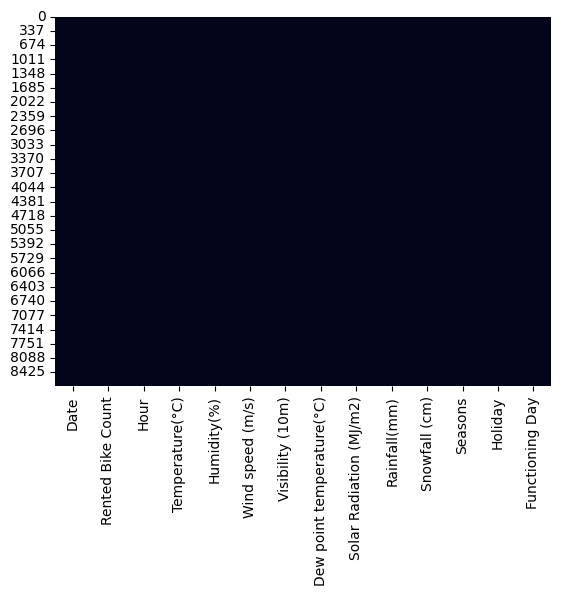

In [42]:
# Visualizing the missing values
# Checking Null Value by Plotting Heatmap
sns.heatmap(data.isnull(), cbar=False)

### What did you know about your dataset?

The Seoul Bike Sharing Demand dataset contains information about bike rental in Seoul from 2017-2018. It includes hourly observations of 14 columns, such as the date, time, number of rented bikes, weather conditions, and other factors that may influence bike rental demand.

This dataset contains 8760 rows and 14 columns of the data.

There are no duplicate rows in the dataset.

Also there are no missing values or Null values in the dataset.

## ***2. Understanding Your Variables***

In [43]:
# Dataset Columns
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [44]:
# Dataset Describe
data.describe().round(2)

Rented Bike Count     Hour  Temperature(°C)  Humidity(%)  \
count            8760.00  8760.00          8760.00      8760.00   
mean              704.60    11.50            12.88        58.23   
std               645.00     6.92            11.94        20.36   
min                 0.00     0.00           -17.80         0.00   
25%               191.00     5.75             3.50        42.00   
50%               504.50    11.50            13.70        57.00   
75%              1065.25    17.25            22.50        74.00   
max              3556.00    23.00            39.40        98.00   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count           8760.00           8760.00                    8760.00   
mean               1.72           1436.83                       4.07   
std                1.04            608.30                      13.06   
min                0.00             27.00                     -30.60   
25%                0.90            940.00                      -4.70   
50%                1.50           1698.00                       5.10   
75%                2.30           2000.00                      14.80   
max                7.40           2000.00                      27.20   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count                  8760.00       8760.00        8760.00  
mean                      0.57          0.15           0.08  
std                       0.87          1.13           0.44  
min                       0.00          0.00           0.00  
25%                       0.00          0.00           0.00  
50%                       0.01          0.00           0.00  
75%                       0.93          0.00           0.00  
max                       3.52         35.00           8.80

### **Variables Description**

###**The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.**

**Attribute Information :**

*   **Date :** The date of the observation.
*   **Rented Bike Count :** The number of bikes rented during the observation period.
*   **Hour :** The hour of the day when the observation was taken.
*   **Temperature(°C) :** The temperature in Celsius at the time of observation.
*   **Humidity(%) :** The percentage of humidity at the time of observation.
*   **Wind speed (m/s) :** The wind speed in meters per second at the time of observation.
*   **Visibility (10m) :** The visibility in meters at the time of observation.
*   **Dew point temperature(°C) :** The dew point temperature in Celsius at the time of observation.
*   **Solar Radiation (MJ/m2) :** The amount of solar radiation in mega-joules per square meter at the time of observation.
*   **Rainfall(mm) :** The amount of rainfall in millimeters during the observation period.
*   **Snowfall(cm) :** The amount of snowfall in centimeters during the observation period.
*   **Seasons :** The season of the year when the observation was taken.
*   **Holiday :** Whether the observation was taken on a holiday or not.
*   **Functioning Day :** Whether the bike sharing system was operating normally or not during the observation period.




### Check Unique Values for each variable.

In [45]:
# Check Unique Values for each variable.
for i in data.columns.tolist():
  print("No. of unique values in",i,"is",data[i].nunique())

No. of unique values in Date is 365
No. of unique values in Rented Bike Count is 2166
No. of unique values in Hour is 24
No. of unique values in Temperature(°C) is 546
No. of unique values in Humidity(%) is 90
No. of unique values in Wind speed (m/s) is 65
No. of unique values in Visibility (10m) is 1789
No. of unique values in Dew point temperature(°C) is 556
No. of unique values in Solar Radiation (MJ/m2) is 345
No. of unique values in Rainfall(mm) is 61
No. of unique values in Snowfall (cm) is 51
No. of unique values in Seasons is 4
No. of unique values in Holiday is 2
No. of unique values in Functioning Day is 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [46]:
# Write your code to make your dataset analysis ready.
# Before doing any data wrangling lets create copy of the dataset
data_2 = data.copy()

In [47]:
# Renaming the columns
data_2.rename(columns= {'Date':'date','Rented Bike Count': 'rented_bike_count', 'Hour':'hour',
                    'Temperature(°C)':'temperature', 'Humidity(%)':'humidity',
                    'Wind speed (m/s)': 'wind_speed', 'Visibility (10m)': 'visibility',
                    'Dew point temperature(°C)':'dew_point_temp',
                    'Solar Radiation (MJ/m2)': 'solar_radiation', 'Rainfall(mm)': 'rainfall',
                    'Snowfall (cm)':'snowfall', 'Seasons':'seasons',
                    'Holiday':'holiday', 'Functioning Day':'func_day'},
          inplace=True)

In [48]:
data_2.columns

Index(['date', 'rented_bike_count', 'hour', 'temperature', 'humidity',
       'wind_speed', 'visibility', 'dew_point_temp', 'solar_radiation',
       'rainfall', 'snowfall', 'seasons', 'holiday', 'func_day'],
      dtype='object')

In [49]:
# converting date variable into datetime datatype
data_2['date'] = data_2['date'].apply(lambda x: dt.strptime(x,'%d/%m/%Y'))

In [50]:
# Creating new columns for day and month
data_2['month'] = data_2['date'].apply(lambda x : x.month)
data_2['day_of_week'] = data_2['date'].apply(lambda x : x.isoweekday())

In [51]:
# engineering new feature 'weekend' from day_of_week
data_2['weekend'] = data_2['day_of_week'].apply(lambda x: 1 if x>5 else 0)

In [52]:
data_2.head()

date  rented_bike_count  hour  temperature  humidity  wind_speed  \
0 2017-12-01                254     0         -5.2        37         2.2   
1 2017-12-01                204     1         -5.5        38         0.8   
2 2017-12-01                173     2         -6.0        39         1.0   
3 2017-12-01                107     3         -6.2        40         0.9   
4 2017-12-01                 78     4         -6.0        36         2.3   

   visibility  dew_point_temp  solar_radiation  rainfall  snowfall seasons  \
0        2000           -17.6              0.0       0.0       0.0  Winter   
1        2000           -17.6              0.0       0.0       0.0  Winter   
2        2000           -17.7              0.0       0.0       0.0  Winter   
3        2000           -17.6              0.0       0.0       0.0  Winter   
4        2000           -18.6              0.0       0.0       0.0  Winter   

      holiday func_day  month  day_of_week  weekend  
0  No Holiday      Yes     12            5        0  
1  No Holiday      Yes     12            5        0  
2  No Holiday      Yes     12            5        0  
3  No Holiday      Yes     12            5        0  
4  No Holiday      Yes     12            5        0

In [53]:
# Describe New Dataset
data_2.describe(include='all').round(2)

date  rented_bike_count     hour  \
count                            8760            8760.00  8760.00   
unique                            NaN                NaN      NaN   
top                               NaN                NaN      NaN   
freq                              NaN                NaN      NaN   
mean    2018-05-31 23:59:59.999999744             704.60    11.50   
min               2017-12-01 00:00:00               0.00     0.00   
25%               2018-03-02 00:00:00             191.00     5.75   
50%               2018-06-01 00:00:00             504.50    11.50   
75%               2018-08-31 00:00:00            1065.25    17.25   
max               2018-11-30 00:00:00            3556.00    23.00   
std                               NaN             645.00     6.92   

        temperature  humidity  wind_speed  visibility  dew_point_temp  \
count       8760.00   8760.00     8760.00     8760.00         8760.00   
unique          NaN       NaN         NaN         NaN             NaN   
top             NaN       NaN         NaN         NaN             NaN   
freq            NaN       NaN         NaN         NaN             NaN   
mean          12.88     58.23        1.72     1436.83            4.07   
min          -17.80      0.00        0.00       27.00          -30.60   
25%            3.50     42.00        0.90      940.00           -4.70   
50%           13.70     57.00        1.50     1698.00            5.10   
75%           22.50     74.00        2.30     2000.00           14.80   
max           39.40     98.00        7.40     2000.00           27.20   
std           11.94     20.36        1.04      608.30           13.06   

        solar_radiation  rainfall  snowfall seasons     holiday func_day  \
count           8760.00   8760.00   8760.00    8760        8760     8760   
unique              NaN       NaN       NaN       4           2        2   
top                 NaN       NaN       NaN  Spring  No Holiday      Yes   
freq                NaN       NaN       NaN    2208        8328     8465   
mean               0.57      0.15      0.08     NaN         NaN      NaN   
min                0.00      0.00      0.00     NaN         NaN      NaN   
25%                0.00      0.00      0.00     NaN         NaN      NaN   
50%                0.01      0.00      0.00     NaN         NaN      NaN   
75%                0.93      0.00      0.00     NaN         NaN      NaN   
max                3.52     35.00      8.80     NaN         NaN      NaN   
std                0.87      1.13      0.44     NaN         NaN      NaN   

          month  day_of_week  weekend  
count   8760.00       8760.0  8760.00  
unique      NaN          NaN      NaN  
top         NaN          NaN      NaN  
freq        NaN          NaN      NaN  
mean       6.53          4.0     0.28  
min        1.00          1.0     0.00  
25%        4.00          2.0     0.00  
50%        7.00          4.0     0.00  
75%       10.00          6.0     1.00  
max       12.00          7.0     1.00  
std        3.45          2.0     0.45

In [54]:
# defining continuous independent variables separately
cont_var = ['temperature', 'humidity', 'wind_speed', 'visibility', 'dew_point_temp','solar_radiation', 'rainfall', 'snowfall']

In [55]:
# defining dependent variable
dependent_variable = ['rented_bike_count']

In [56]:
# defining categorical independent variables separately
cat_var = ['hour','seasons', 'holiday', 'func_day', 'month', 'day_of_week', 'weekend']

### What all manipulations have you done and insights you found?

From the Date column, 'month' and 'day of the week' columns are created.

From the 'day of the week' column, 'weekend' column is created where 6 and 7 are the weekends (Saturday and Sunday).

We have also defined the continuous variables, dependent variable and categorical variables for ease of plotting graphs.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Chart - 1: Dependent variable Distribution**





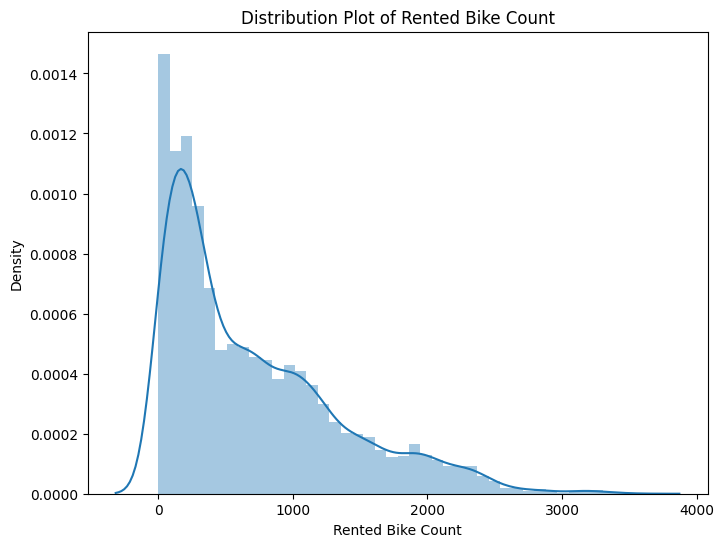

In [57]:
# Chart - 1 visualization code
plt.figure(figsize=(8, 6))
sns.distplot(data_2['rented_bike_count'])
plt.xlabel("Rented Bike Count")
plt.title('Distribution Plot of Rented Bike Count')
plt.show()

##### **1. Why did you pick the specific chart?**



A distplot, also known as a histogram-kernel density estimate (KDE) plot. It is useful because it provides a quick and easy way to check the distribution of the data, identify patterns or outliers, and compare the distribution of multiple variables. It also allows to check if the data is following normal distribution or not.

Thus, I used the histogram plot to analyse the variable distributions over the whole dataset whether it's symmetric or not.

##### **2. What is/are the insight(s) found from the chart?**

From above distribution plot of dependent variable rented bike, we can clearly see that the distribution is positively skewed (Right skewed).

It means that distribution is not symmetric around the the mean.

##### **3. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, definately from this insight we got to know that our data is not normally distributed. So, before doing or implementing any model on this data we need to normalise this data.

#### **Chart - 2 : Distribution/ Box plot**

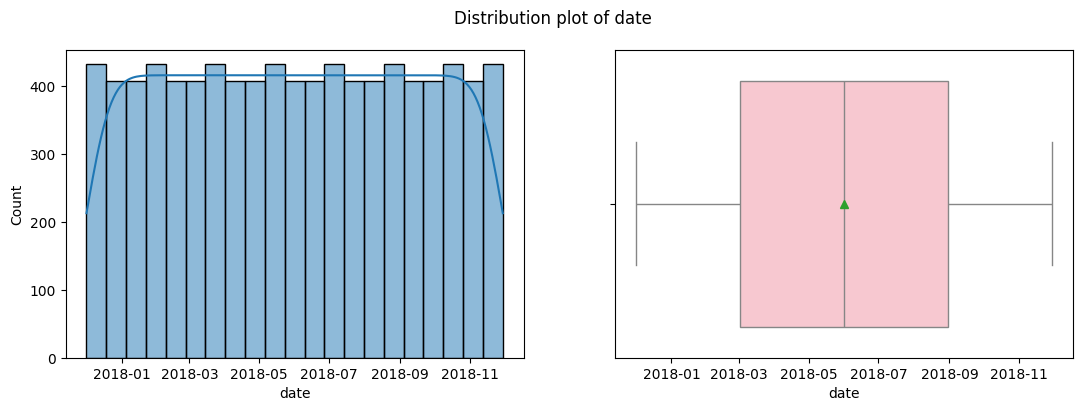

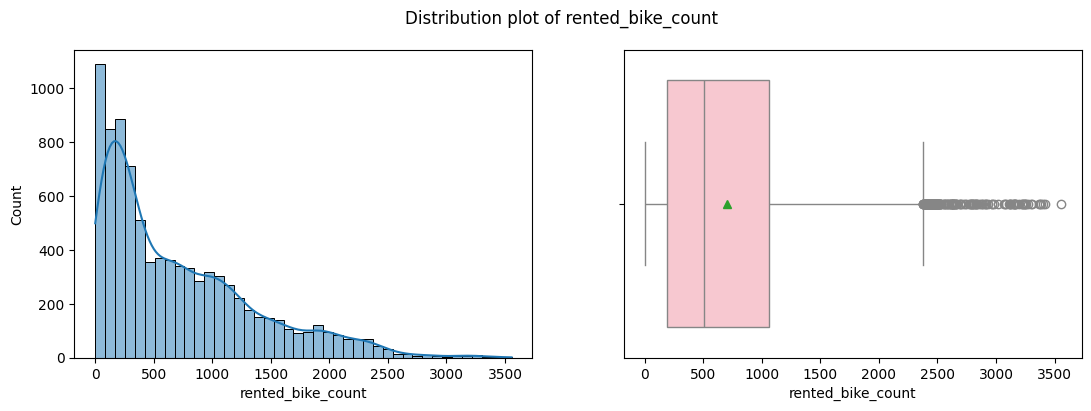

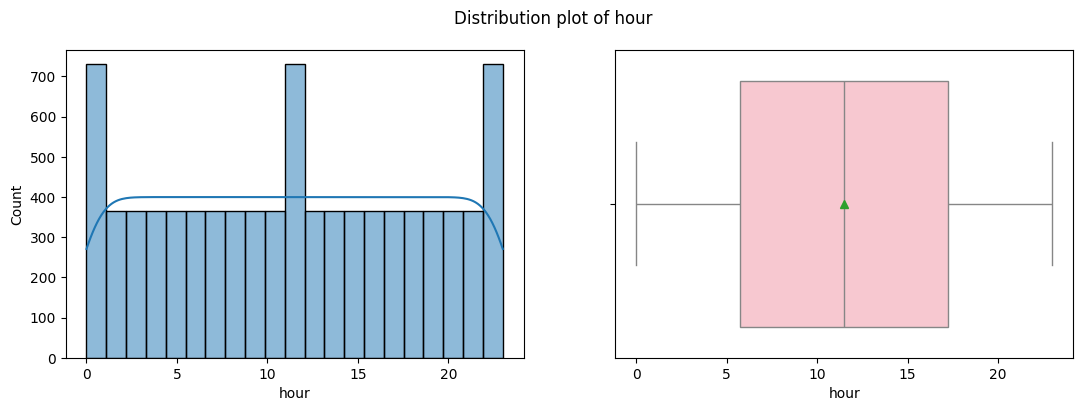

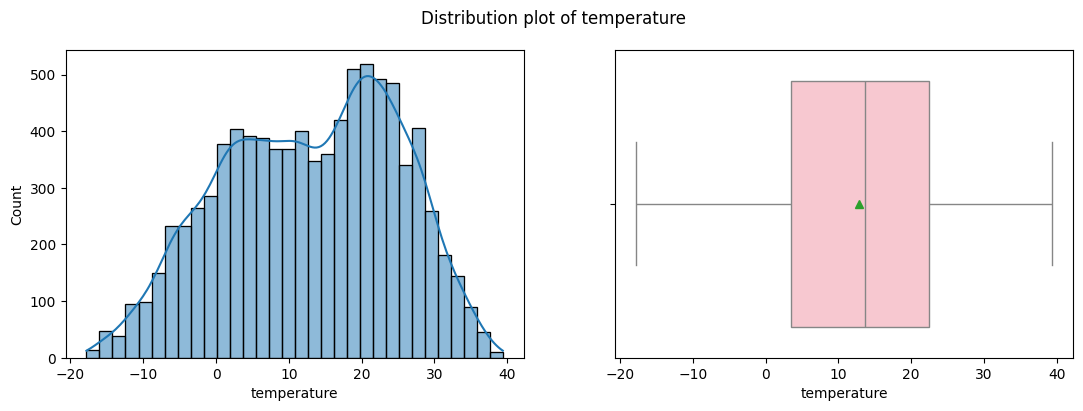

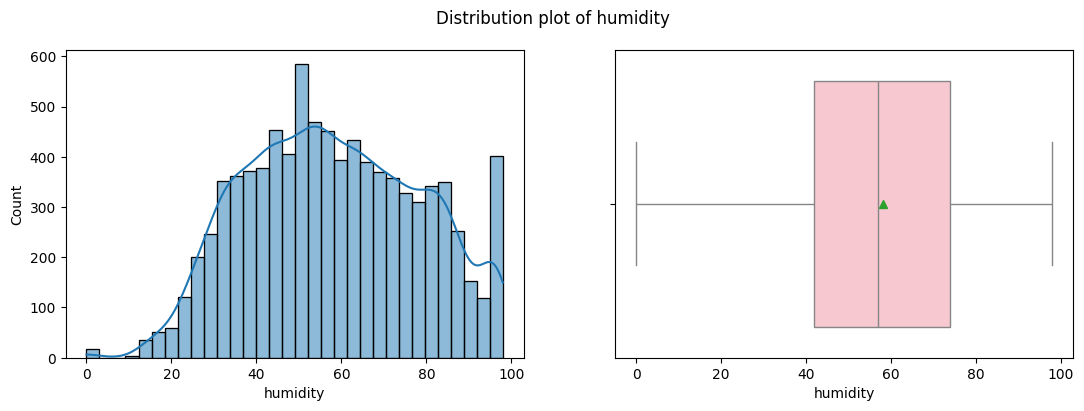

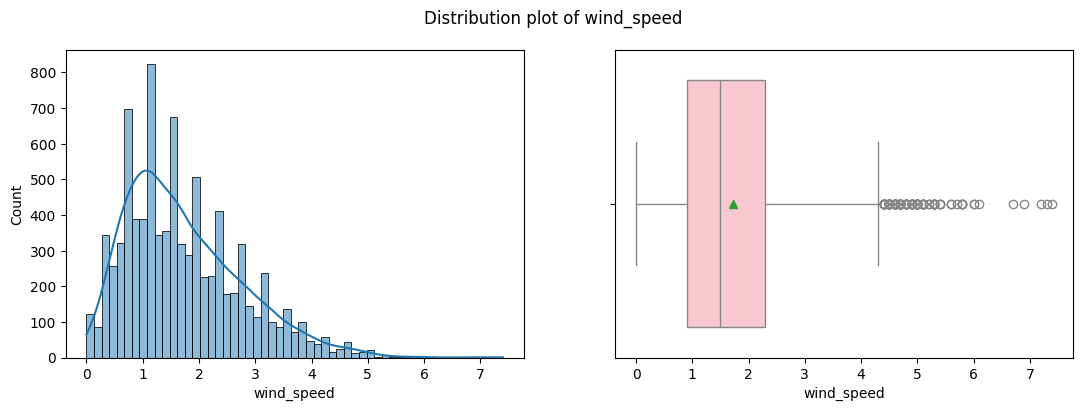

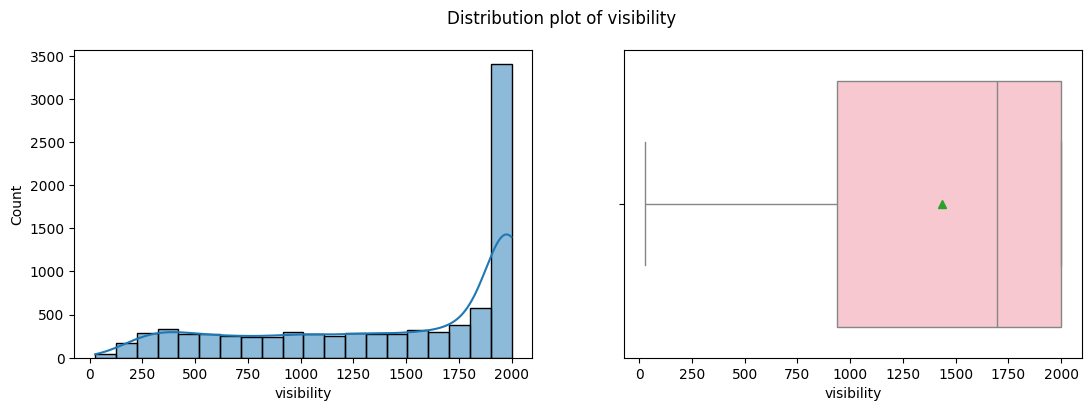

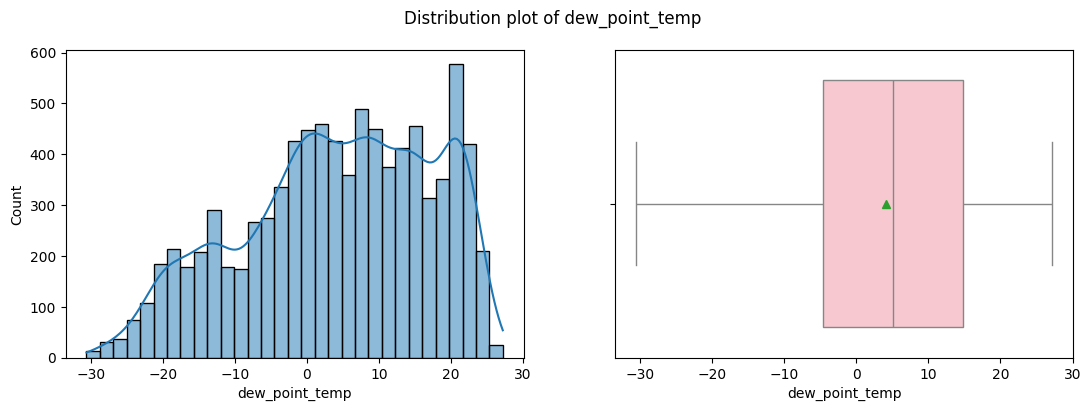

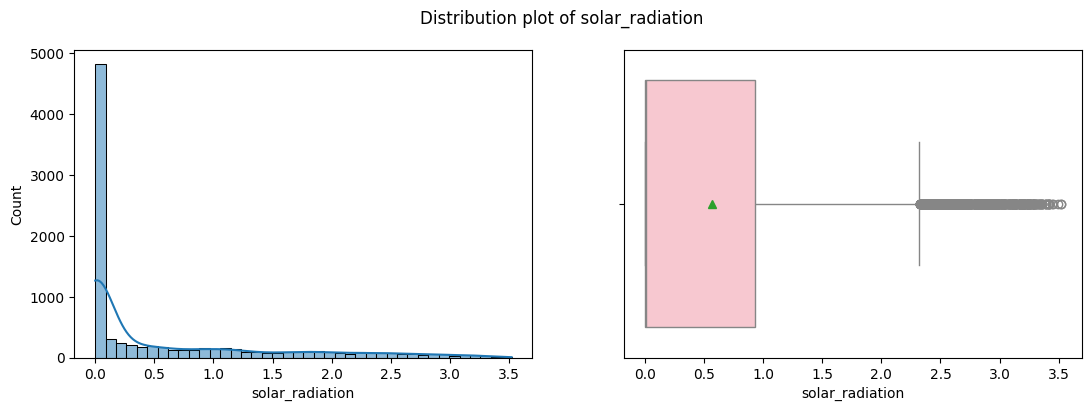

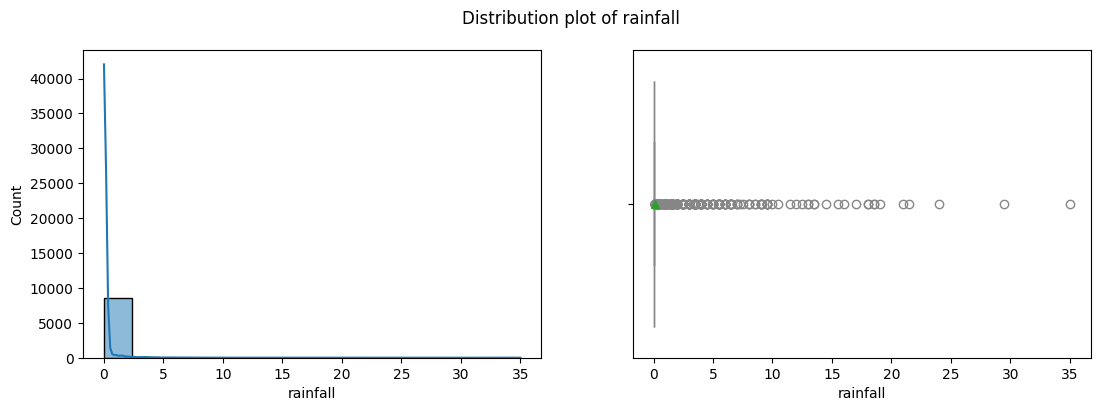

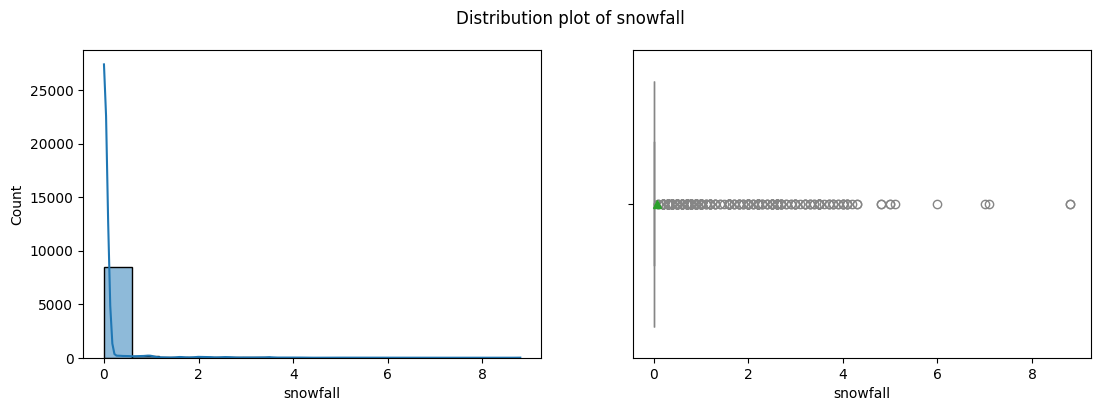

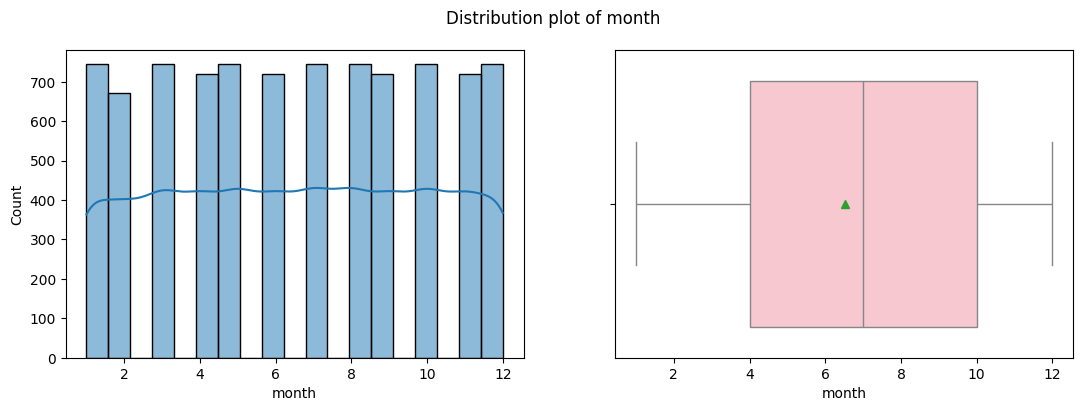

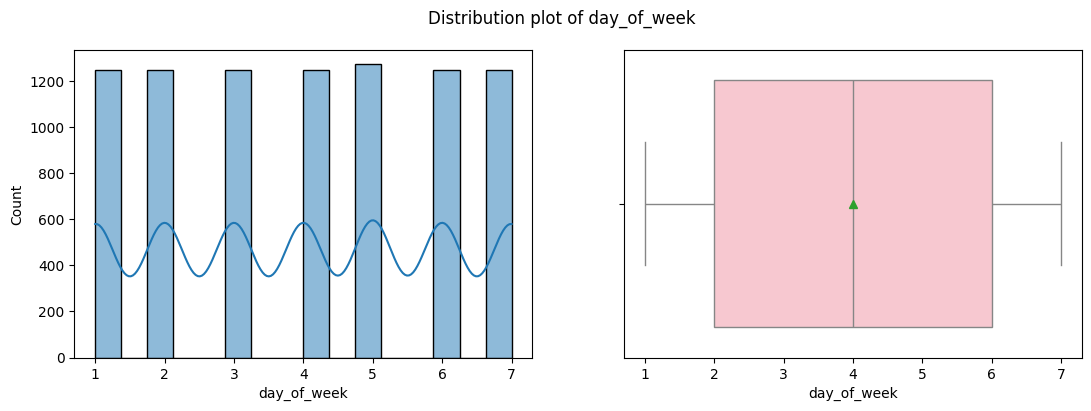

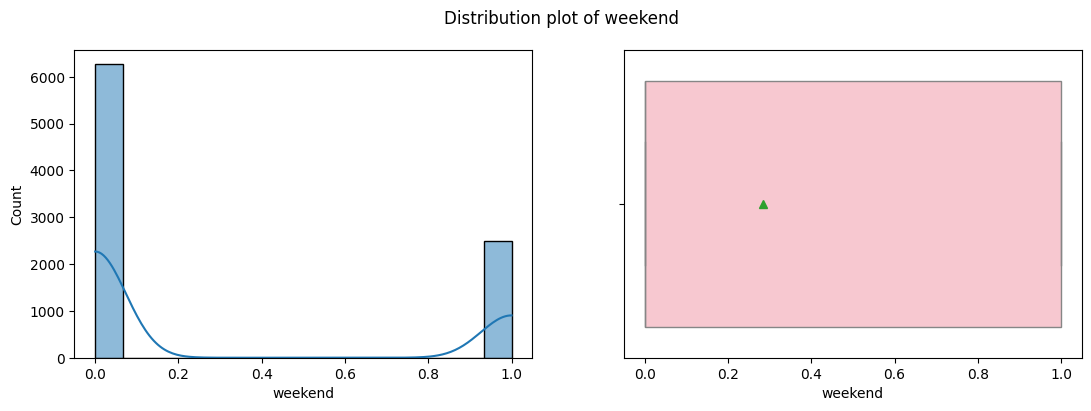

In [58]:
# Visualizing code of histogram plot & boxplot for each columns to know the data distribution
for col in data_2.describe().columns:
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(13,4))
    sns.histplot(data_2[col], ax = axes[0],kde = True)
    sns.boxplot(data_2[col], ax = axes[1],orient='h',showmeans=True,color='pink')
    fig.suptitle("Distribution plot of "+ col, fontsize = 12)
    plt.show()

##### **1. Why did you pick the specific chart?**

A histplot is a type of chart that displays the distribution of a dataset. It is a graphical representation of the data that shows how often each value or group of values occurs. Histplots are useful for understanding the distribution of a dataset and identifying patterns or trends in the data. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

Thus, we used the histogram plot to analysis the variable distributions over the whole dataset whether it's symmetric or not.

A boxplot is used to summarize the key statistical characteristics of a dataset, including the median, quartiles, and range, in a single plot. Boxplots are useful for identifying the presence of outliers in a dataset, comparing the distribution of multiple datasets, and understanding the dispersion of the data. They are often used in statistical analysis and data visualization.

Thus, for each numerical varibale in the given dataset, we used box plot to analyse the outliers and interquartile range including mean, median, maximum and minimum value.

##### **2. What is/are the insight(s) found from the chart?**

From above univariate analysis of all continuous feature variables. We got to know that only tempture and humidity columns are looks normally distributed others shows the different distributions.

Also we can see that there are outlier values in snowfall, rainfall, wind speed & solar radiation columns

##### **3. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

Histogram and Box plot cannot give us whole information regarding data. It's done just to see the distribution of the column data over the dataset.

#### **Chart - 3 : Dependent variable with continuous variables (Bivariate)**

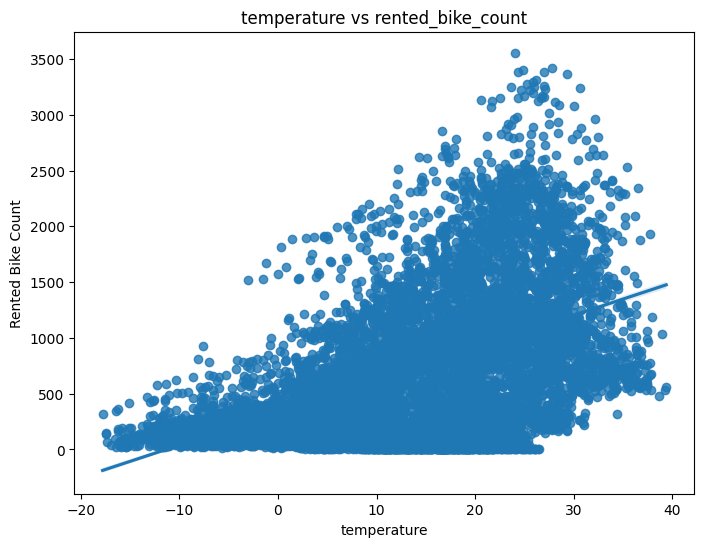

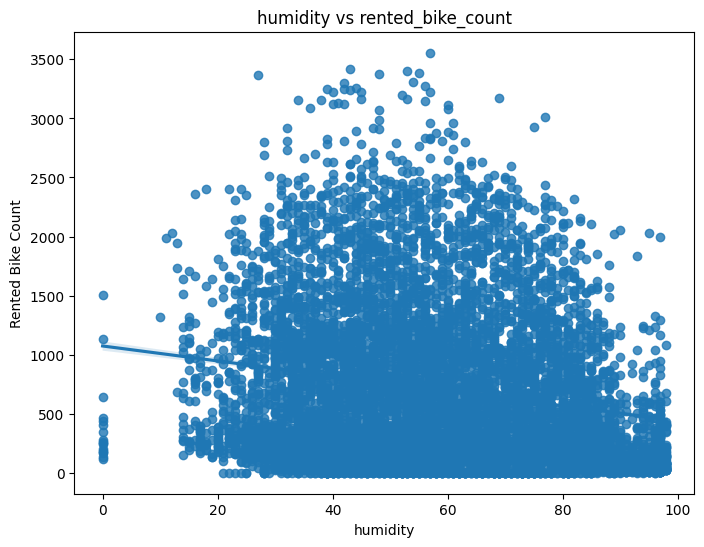

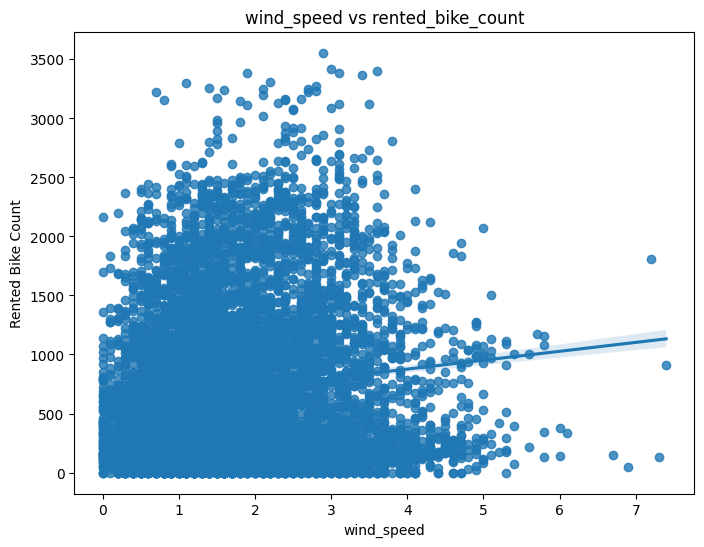

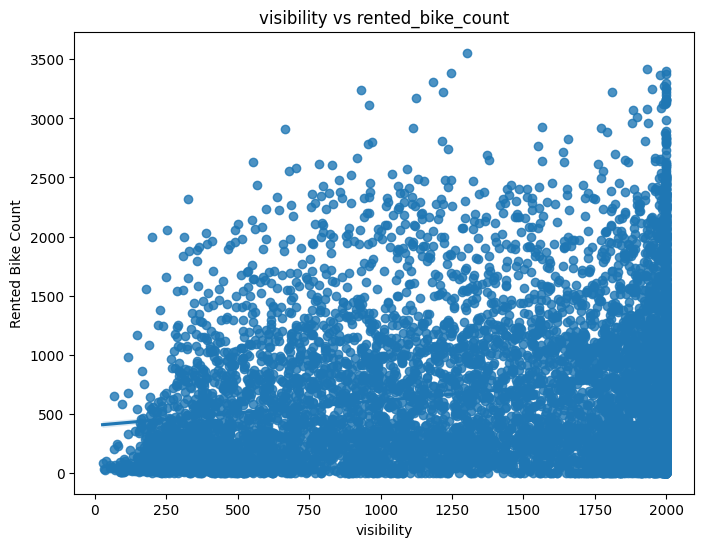

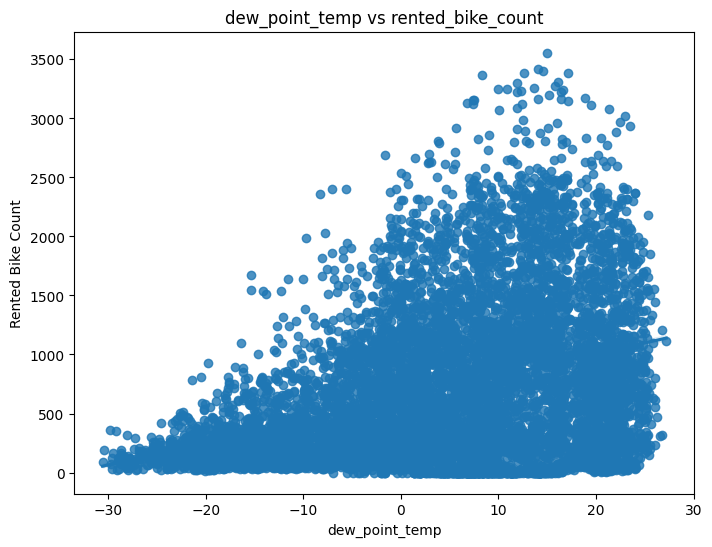

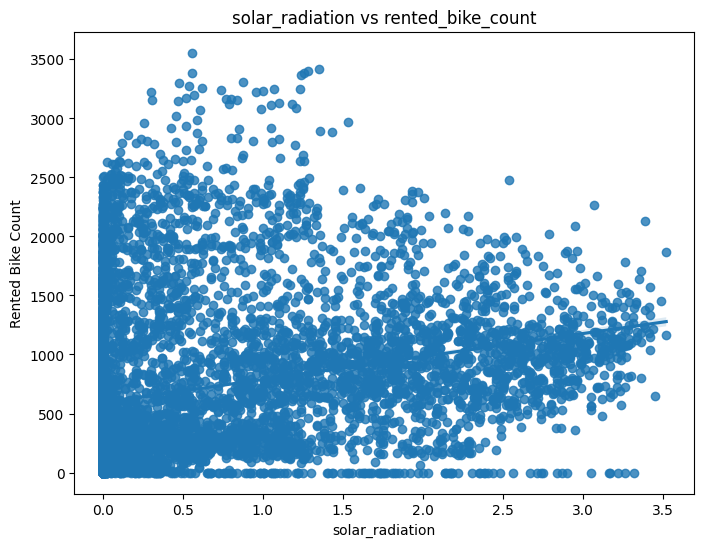

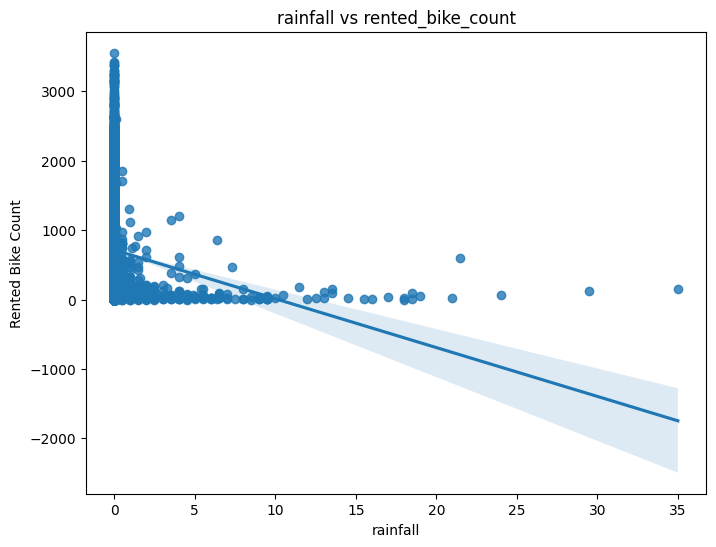

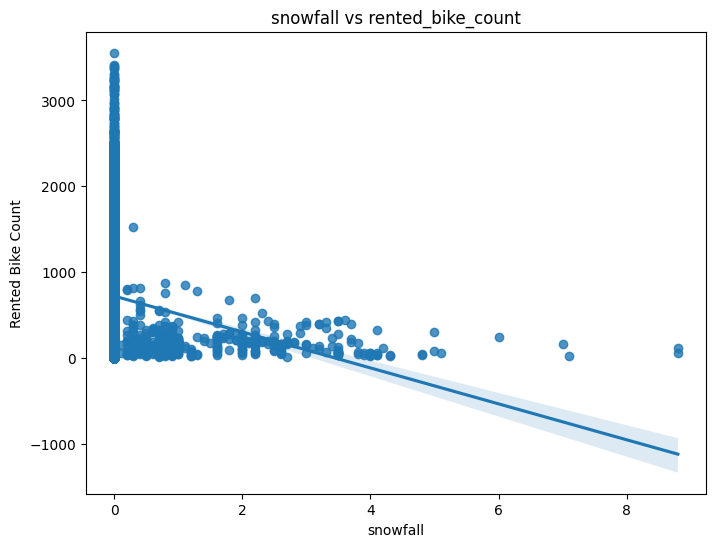

In [59]:
# Analyzing the relationship between the dependent variable and the continuous variables
for i in cont_var:
  plt.figure(figsize=(8,6))
  sns.regplot(x=i,y=dependent_variable[0],data=data_2)
  plt.ylabel("Rented Bike Count")
  plt.xlabel(i)
  plt.title(i+' vs '+ dependent_variable[0])
  plt.show()

##### **1. Why did you pick the specific chart?**

Regplot is used to create a scatter plot with linear regression line. The purpose of this function is to visualize the relationship between two continuous variables. It can help to identify patterns and trends in the data, and can also be used to test for linearity and independence of the variables.

To check the patterns between independent variable with our rented bike dependent variable we used this regplot.

##### **2. What is/are the insight(s) found from the chart?**

From above regression plot we can see that there is some linearity between temperature, solar radiation & dew point temperature with dependent variable rented bike

Other variables are not showing any patterns.

##### **3. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it helped a little bit from this we got to know that there are few variables which are showing some patterns with dependent variable this variable are maybe important feature while predicting for rented bike count so business needs focus on these variables.

#### **Chart - 4 : Categorical variables with dependent variable (Bivariate)**

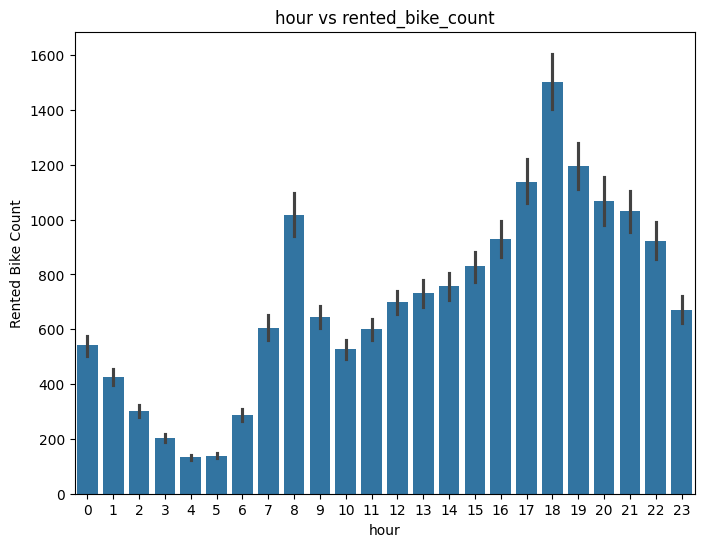

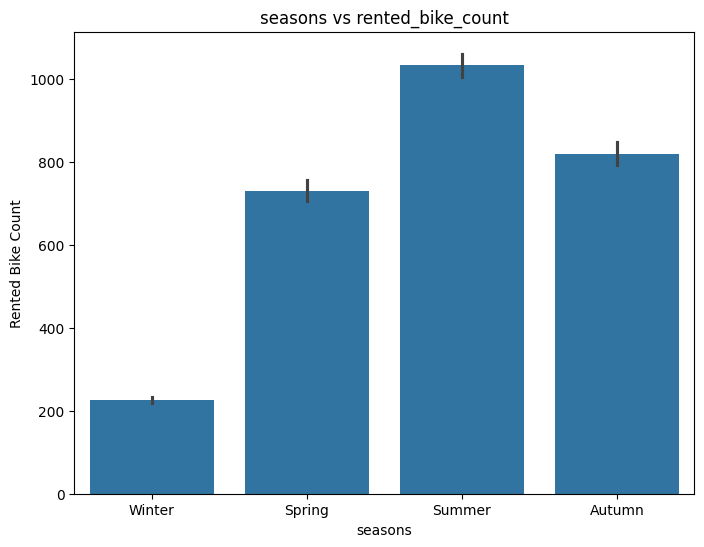

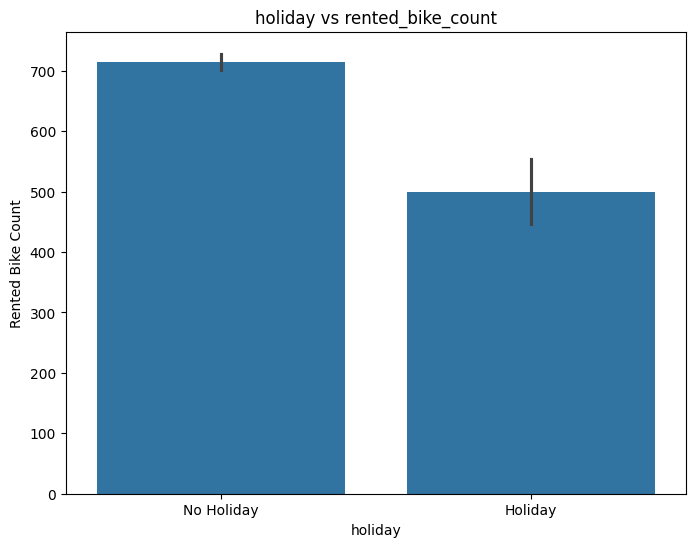

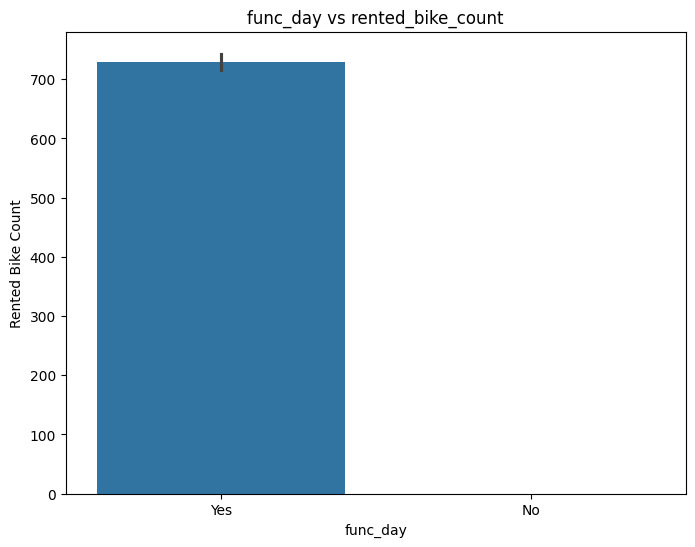

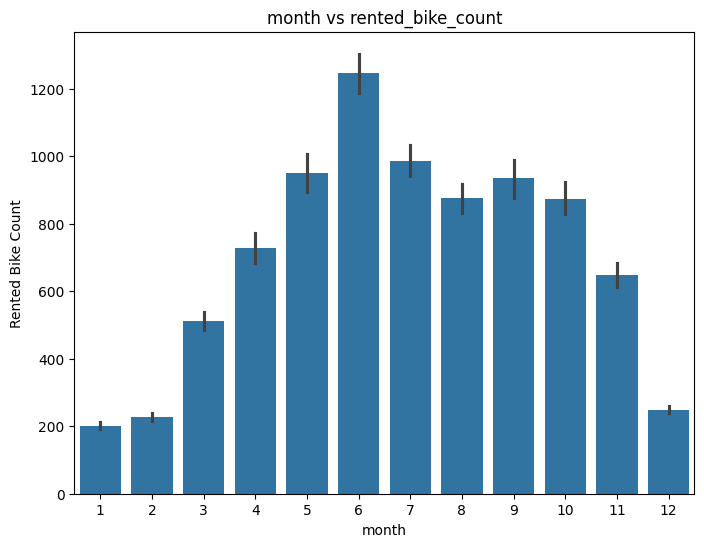

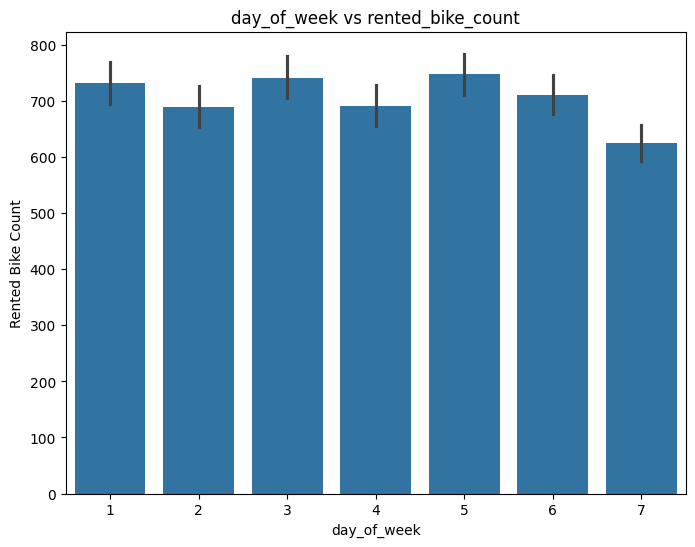

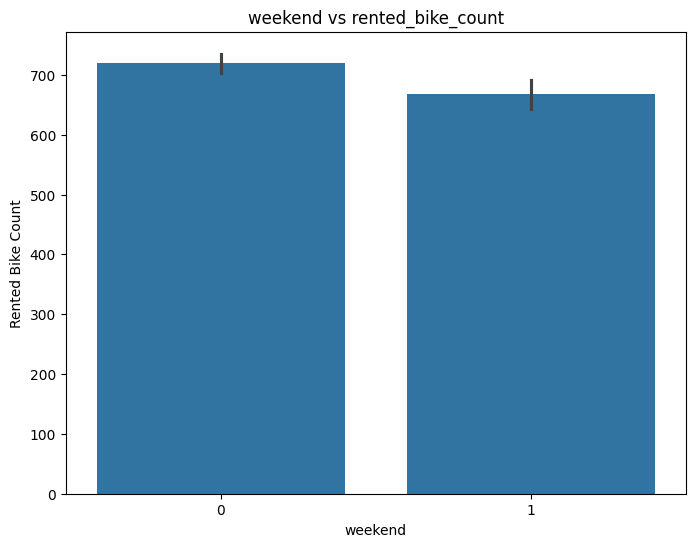

In [60]:
# Analyzing the relationship between the dependent variable and the categorical variables
for i in cat_var:
  plt.figure(figsize=(8,6))
  sns.barplot(x=i,y=dependent_variable[0],data=data_2)
  plt.ylabel("Rented Bike Count")
  plt.xlabel(i)
  plt.title(i+' vs '+ dependent_variable[0])
  plt.show()

##### **1. Why did you pick the specific chart?**

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

To show the distribution of the rented bike count with other categorical variables we used bar charts.

##### **2. What is/are the insight(s) found from the chart?**

From above bar charts we got insights:
1.   In hour vs rented bike chart there is high demand in the morning 8'o clock and evening 18'o clock.
2.   From season vs rented bike chart there is more demand in summer and less demand in winter.
3.   From day_of_week vs rented bike chart there is high demand on working days.
4.   From month chart we know that there is high demand in month of june.

##### **3. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insights are going to provide some positive business impact, beacause analysing the demand on the basis of categorical varible we got to know that when demand for bike is more so we can focus more on that portion.

#### **Chart - 5 : Rented Bike vs Hour**

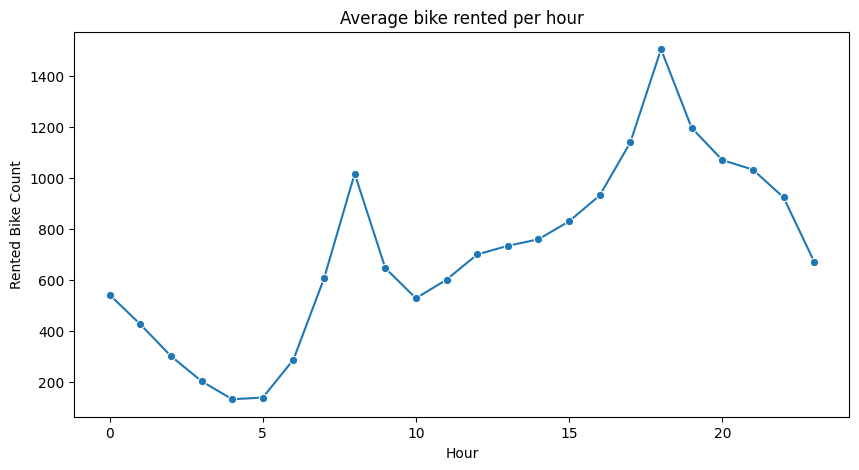

In [61]:
# ploting line graph
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = data_2.groupby('hour')['rented_bike_count'].mean()

# plot average rent over time(hrs)
plt.figure(figsize=(10,5))
sns.lineplot(data=avg_rent_hrs, marker='o')
plt.ylabel("Rented Bike Count")
plt.xlabel("Hour")
plt.title('Average bike rented per hour')
plt.show()
# a=avg_rent_hrs.plot(legend=True,marker='o',title="Average Bikes Rented Per Hr")
# a.set_xticks(range(len(avg_rent_hrs)))
# a.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85)

##### **1. Why did you pick the specific chart?**

A line plot, also known as a line chart or line graph, is a way to visualize the trend of a single variable over time. It uses a series of data points connected by a line to show how the value of the variable changes over time.

Line plots are useful because they can quickly and easily show trends and patterns in the data. They are particularly useful for showing how a variable changes over a period of time. They are also useful for comparing the trends of multiple variables.

To see how rented bike demand is distributed over 24 hours time we used line plot.

##### **2. What is/are the insight(s) found from the chart?**

From above line plot we can clearly see that there is high demand in the morning and in the evening.

##### **3. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from above insight we know that there is high demand in morning and evening so business needs to focus more on that time slot, as well as try to meet the demand on that time slot.

#### **Chart - 6 : Bike demand throughout the day (Multivariate)**

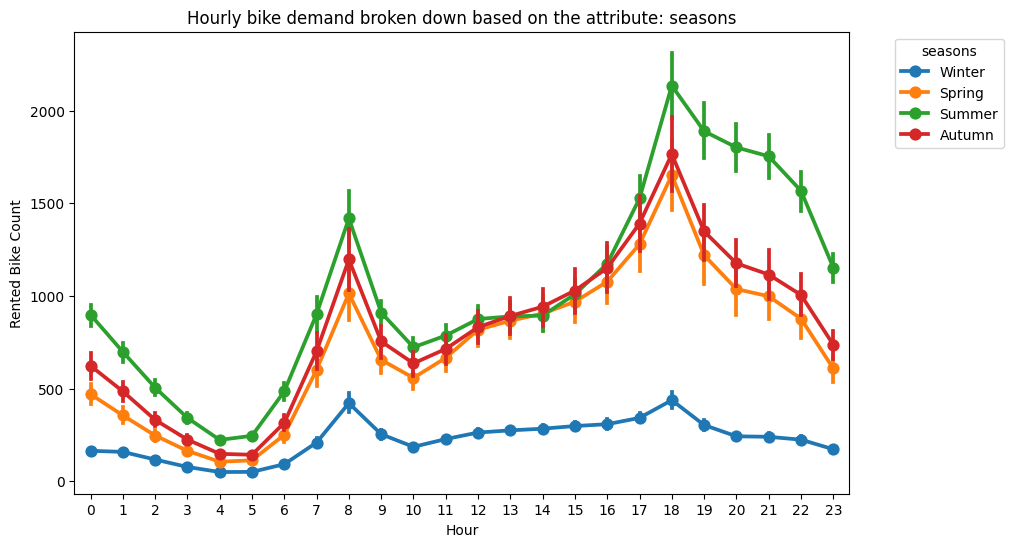

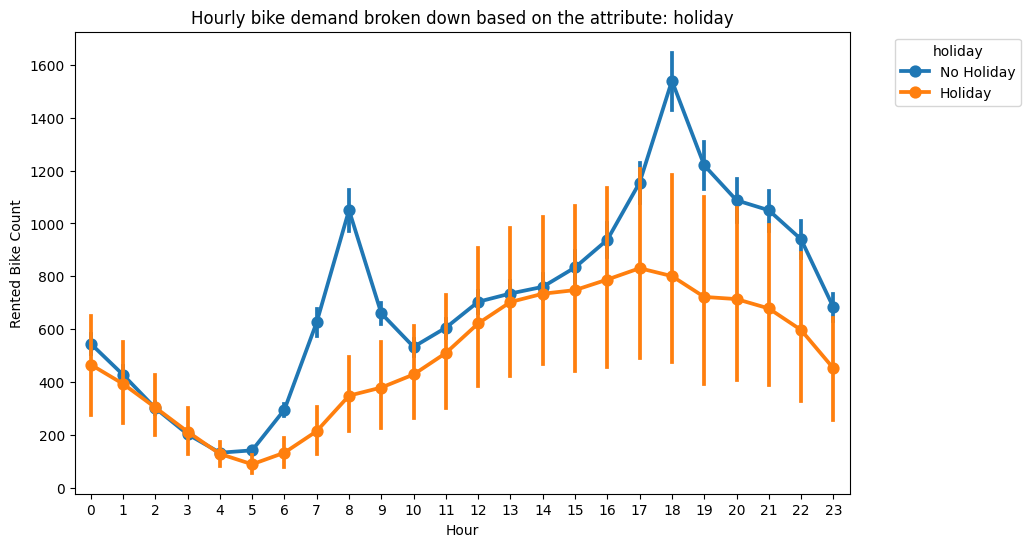

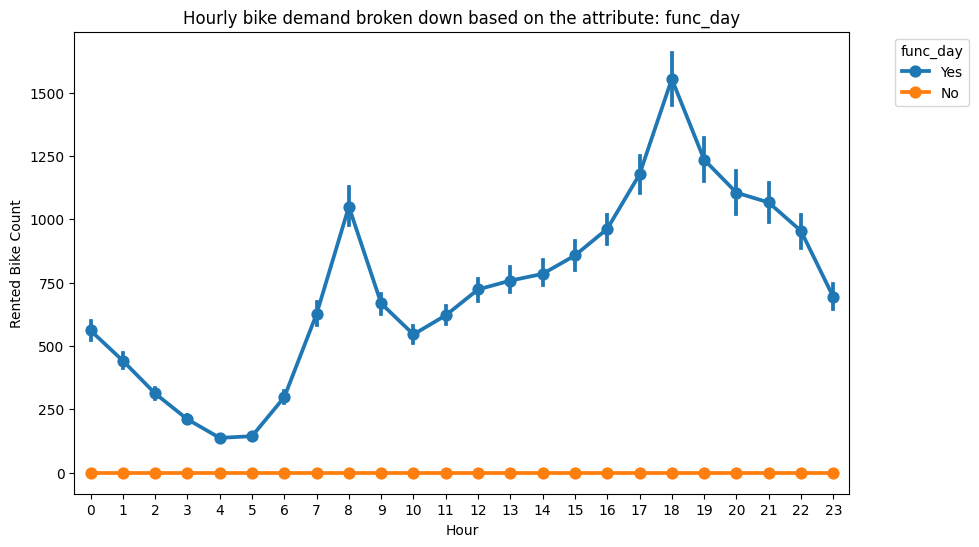

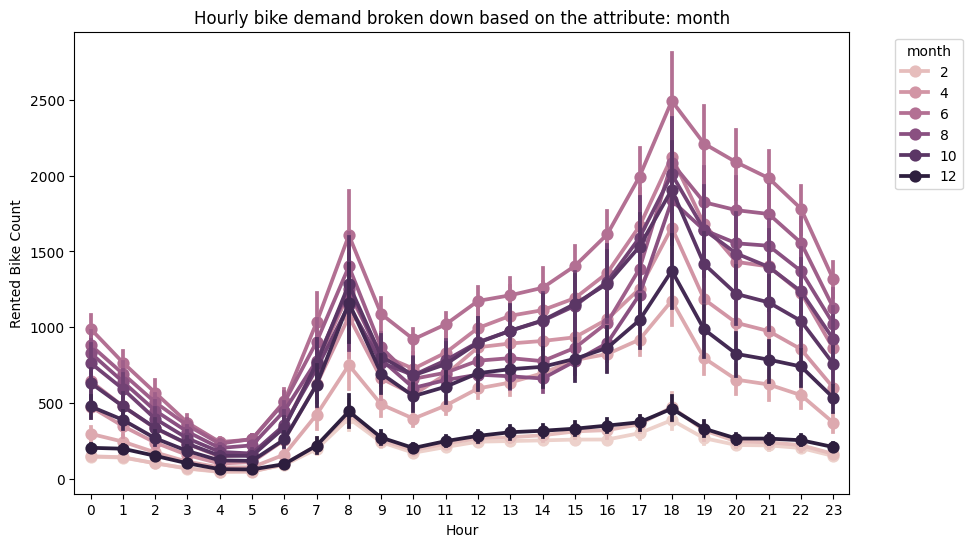

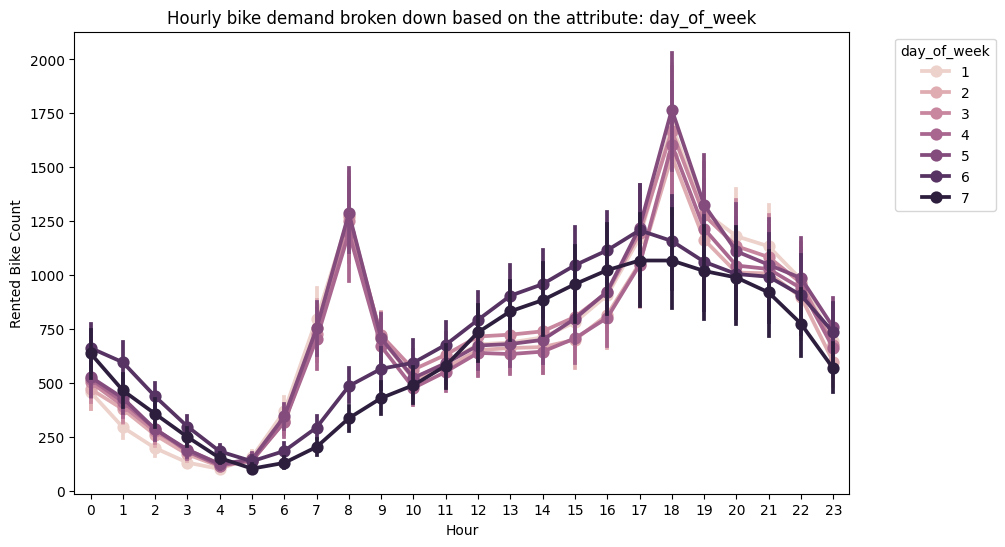

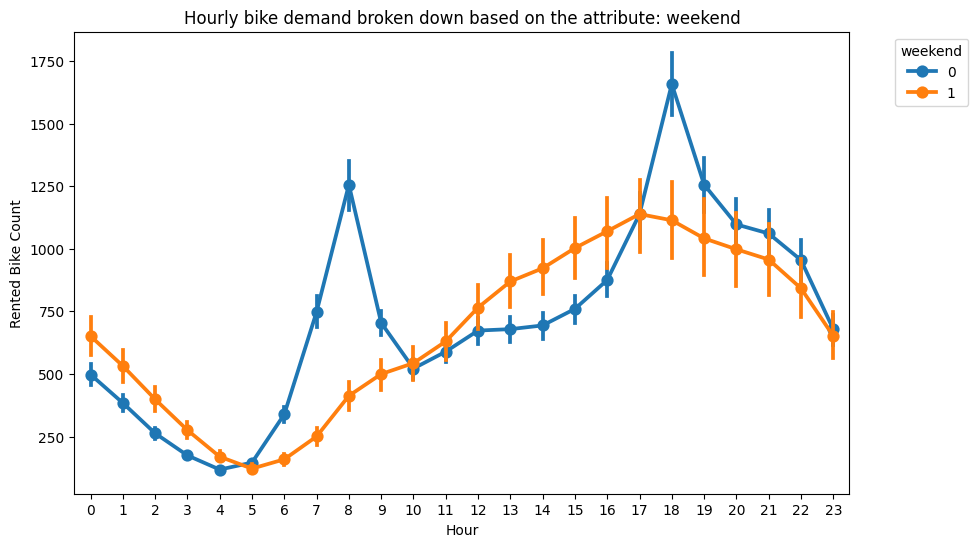

In [62]:
# Chart - 6 visualization code
for i in cat_var:
  if i == 'hour':
    continue
  else:
    fig, ax = plt.subplots(figsize=(10,6))
    sns.pointplot(data=data_2, x='hour', y='rented_bike_count', hue=i, ax=ax)
    plt.ylabel("Rented Bike Count")
    plt.xlabel("Hour")
    plt.title('Hourly bike demand broken down based on the attribute: '+i)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title=i)
    plt.show()

##### **1. Why did you pick the specific chart?**

A line plot, also known as a line chart or line graph, is a way to visualize the trend of a single variable over time. It uses a series of data points connected by a line to show how the value of the variable changes over time.

Line plots are useful because they can quickly and easily show trends and patterns in the data. They are particularly useful for showing how a variable changes over a period of time. They are also useful for comparing the trends of multiple variables.

To show the demand of rented bike throughout the day on the basis of other categorical variable we used line plot drawing multiple lines on charts.

##### **2. What is/are the insight(s) found from the chart?**

From above line plots we see that :
1.   In winter season there is no significant demand even in the morning or in the evening.
2.   On the functional day (i.e No Holiday) there is spike in morning and in evening, but that is not there on Holidays.
3.   Around 3 months in winter season (i.e December, January & February) there is low demand.
4.   On weekend almost throught the day there is demand.




##### **3. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from this analysis we figure out some key factors such as high demand in morning and evening slot in all the seasons.



#### **Chart - 7 : Categorical plot for seasons**

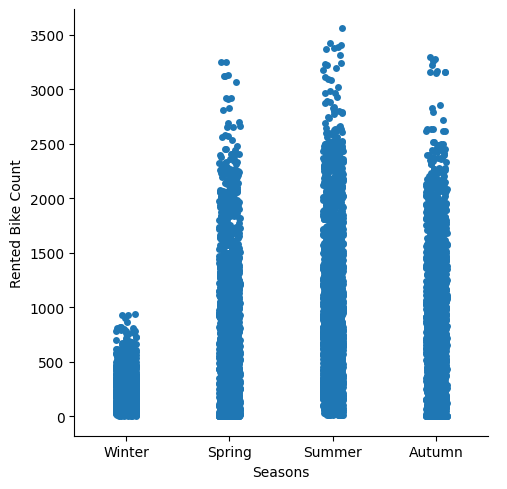

In [63]:
# plot for rented bike count seasonly
sns.catplot(x='seasons',y='rented_bike_count',data=data_2)
plt.ylabel("Rented Bike Count")
plt.xlabel("Seasons")
plt.show()

##### **1. Why did you pick the specific chart?**

Catplot is used to create a categorical plot. Categorical plots are plots that are used to visualize the distribution of a categorical variable. They can be used to show how a variable is related to a categorical variable and can also be used to compare the distribution of multiple categorical variables.

To see the distribution of the rented bike on basis of season column we used catplot.

##### **2. What is/are the insight(s) found from the chart?**

From above catplot we got to know that:
1.   There is low demand in winter.
2.   Also in all seasons upto the 2500 bike counts distribution is seen dense.

##### **3. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from this catplot we know that there is high bike count upto the 2500 so, above that there maybe outliers present. business needs to evaluate that.

#### **Chart - 8 : Pie plot for seasons**

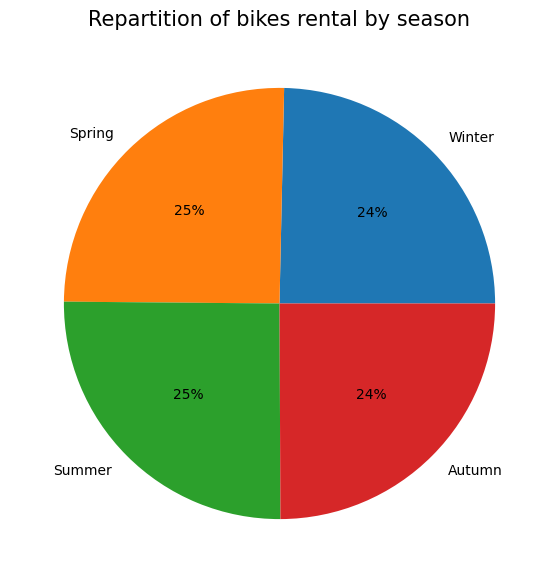

In [65]:
# Chart - 8 visualization code
Winter=data_2[data_2["seasons"]=='Winter'].count()
Spring=data_2[data_2["seasons"]=='Spring'].count()
Summer=data_2[data_2["seasons"]=='Summer'].count()
Autumn=data_2[data_2["seasons"]=='Autumn'].count()

BikeSeasons={"Winter":Winter["rented_bike_count"],"Spring":Spring["rented_bike_count"],"Summer":Summer["rented_bike_count"],"Autumn":Autumn["rented_bike_count"]}
plt.gcf().set_size_inches(7,7)
plt.pie(BikeSeasons.values(),labels=BikeSeasons.keys(), autopct='%1d%%');
plt.title("Repartition of bikes rental by season", fontsize=15)
plt.show()

##### **1. Why did you pick the specific chart?**

Pie charts are generally used to show the proportions of a whole, and are especially useful for displaying data that has already been calculated as a percentage of the whole.

So, we used pie chart to see percentage distribution of rented bike on the basis of seasons.

##### **2. What is/are the insight(s) found from the chart?**

From above pie chart:
1.   In year data season summer contributes around 36% then autumn around 29%.
2.   Lowest demand in winter, it contributes around only 7%.

##### **3. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

This insights only tell about percentage contribution of year data of season variable, which clearly gave indication about demand.



#### **Chart - 9 : Temperature and Solar Radiation over time**

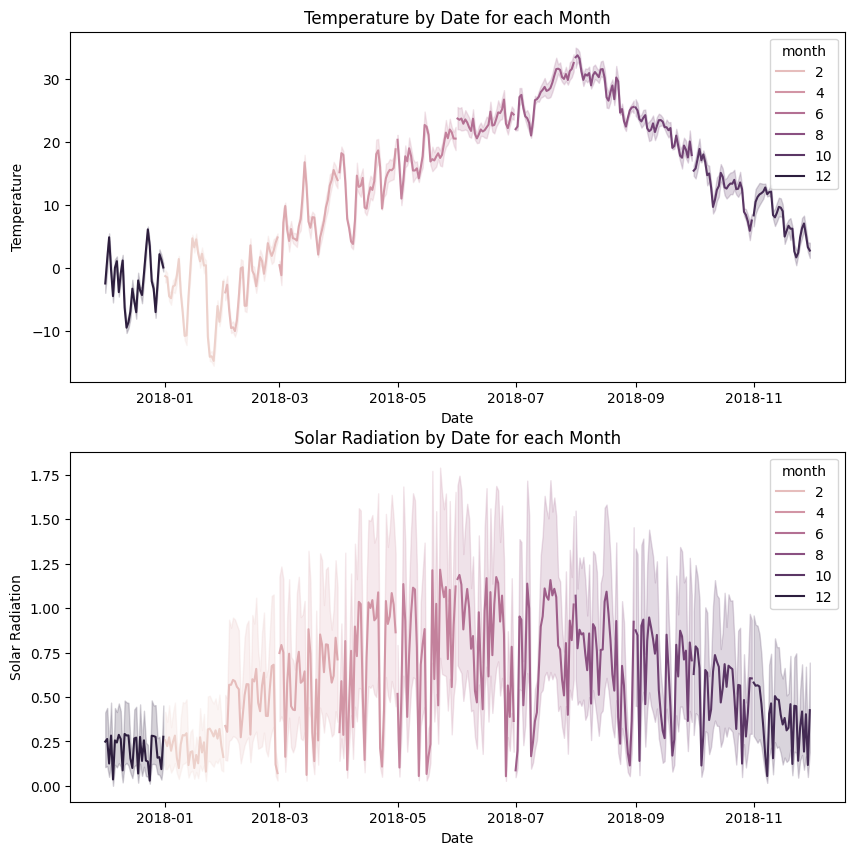

In [66]:
# Chart - 9 visualization code
plt.figure(figsize=(10,10))

# Plot temperature
plt.subplot(2, 1, 1)
sns.lineplot(x='date', y='temperature', hue='month', data=data_2)
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.title("Temperature by Date for each Month")

# Plot humidity
plt.subplot(2, 1, 2)
sns.lineplot(x='date', y='solar_radiation', hue='month', data=data_2)
plt.ylabel('Solar Radiation')
plt.xlabel('Date')
plt.title("Solar Radiation by Date for each Month")
plt.show()

##### **1. Why did you pick the specific chart?**

Line charts are a useful tool for visualizing trends over time. It allows us in easy identification of patterns and changes over time.

##### **2. What is/are the insight(s) found from the chart?**

As expected temperature rises during summer months and lowers in winter months.

Similarly solar radiation is more in summer months compared to winter months, also huge fluctuations in solar radiation may be caused due to day-night cycle as there is no sunlight at night time.

##### **3. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

This may not be much helpful in creating positive business impact as this is a natural phenomenon and we can't control it.

#### **Chart - 10 : Avg Rented Bike Count by Wind speed**

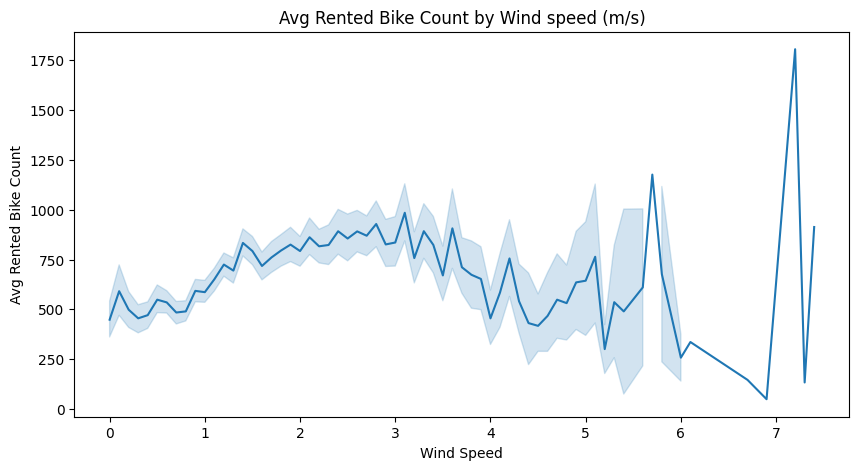

In [67]:
# Chart - 10 visualization code
plt.figure(figsize=(10,5))
sns.lineplot(x='wind_speed', y='rented_bike_count', data=data_2)
plt.ylabel("Avg Rented Bike Count")
plt.xlabel("Wind Speed")
plt.title("Avg Rented Bike Count by Wind speed (m/s)")
plt.show()

In [68]:
data_2['wind_speed'].value_counts()

wind_speed
1.1    420
1.2    403
1.0    388
0.9    388
0.8    385
      ... 
7.2      1
6.1      1
7.3      1
6.9      1
5.7      1
Name: count, Length: 65, dtype: int64

##### **1. Why did you pick the specific chart?**

Line charts are a useful tool for visualizing trends over time. It allows us in easy identification of patterns and changes over time (in this case over wind speed).

##### **2. What is/are the insight(s) found from the chart?**

Initially wind speed increases, the demand increases since flowing air creates better weather and less heat, although too high wind speed created storm and all so too high speed leads to decreases in demand.

##### **3. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

This may not be much helpful in creating positive business impact as this is a natural phenomenon and we can't control it.



#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 14 - Correlation Heatmap**

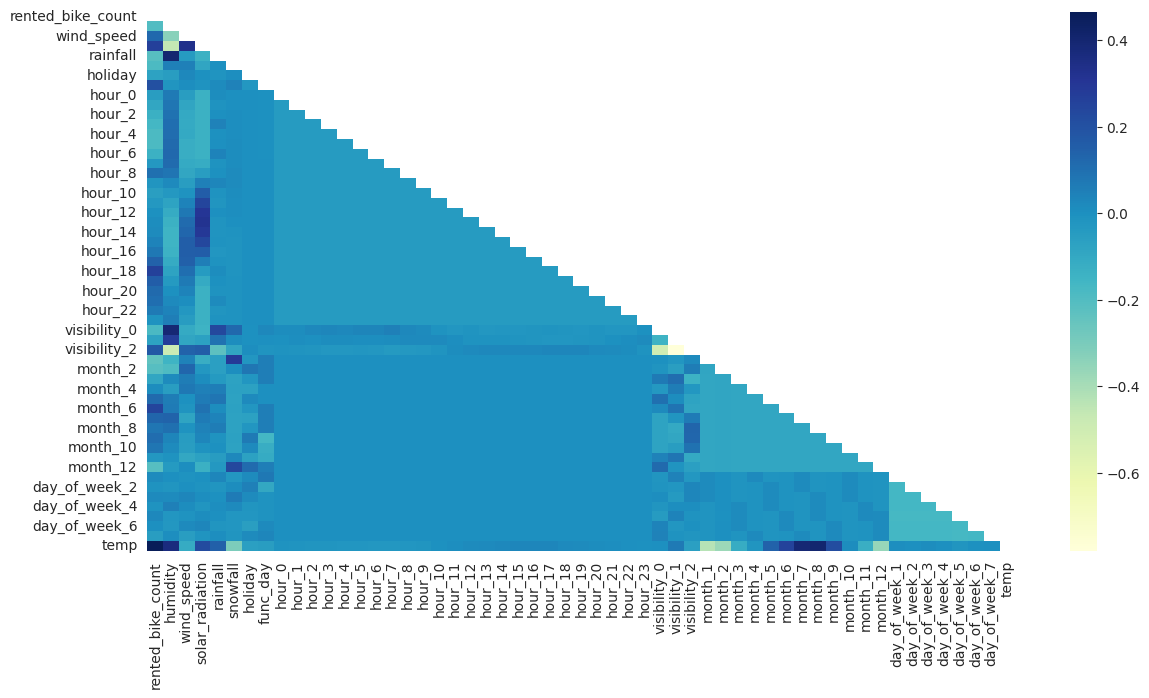

In [165]:
# Correlation Heatmap visualization code
corr1 = data_2.corr()
mask = np.zeros_like(corr1)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14,7))
    ax = sns.heatmap(corr1, mask=mask, cmap="YlGnBu")

##### **1. Why did you pick the specific chart?**

The correlation coefficient is a measure of the strength and direction of a linear relationship between two variables. A correlation matrix is used to summarize the relationships among a set of variables and is an important tool for data exploration and for selecting which variables to include in a model. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, we have used correlation heatmap.

##### **2. What is/are the insight(s) found from the chart?**

From above correlation map we can clearly see that:
1.   There is high multicolinearity between independent variable (i.e temperature & dew point temp, humidity & dew point temp, weekend & day of week).
2.   There is correlation of temperature, hour, dew point temp & solar radiation with dependent variable rented bike.
3.   Other than that we didnt see any correlation.


#### **Chart - 15 - Pair Plot**

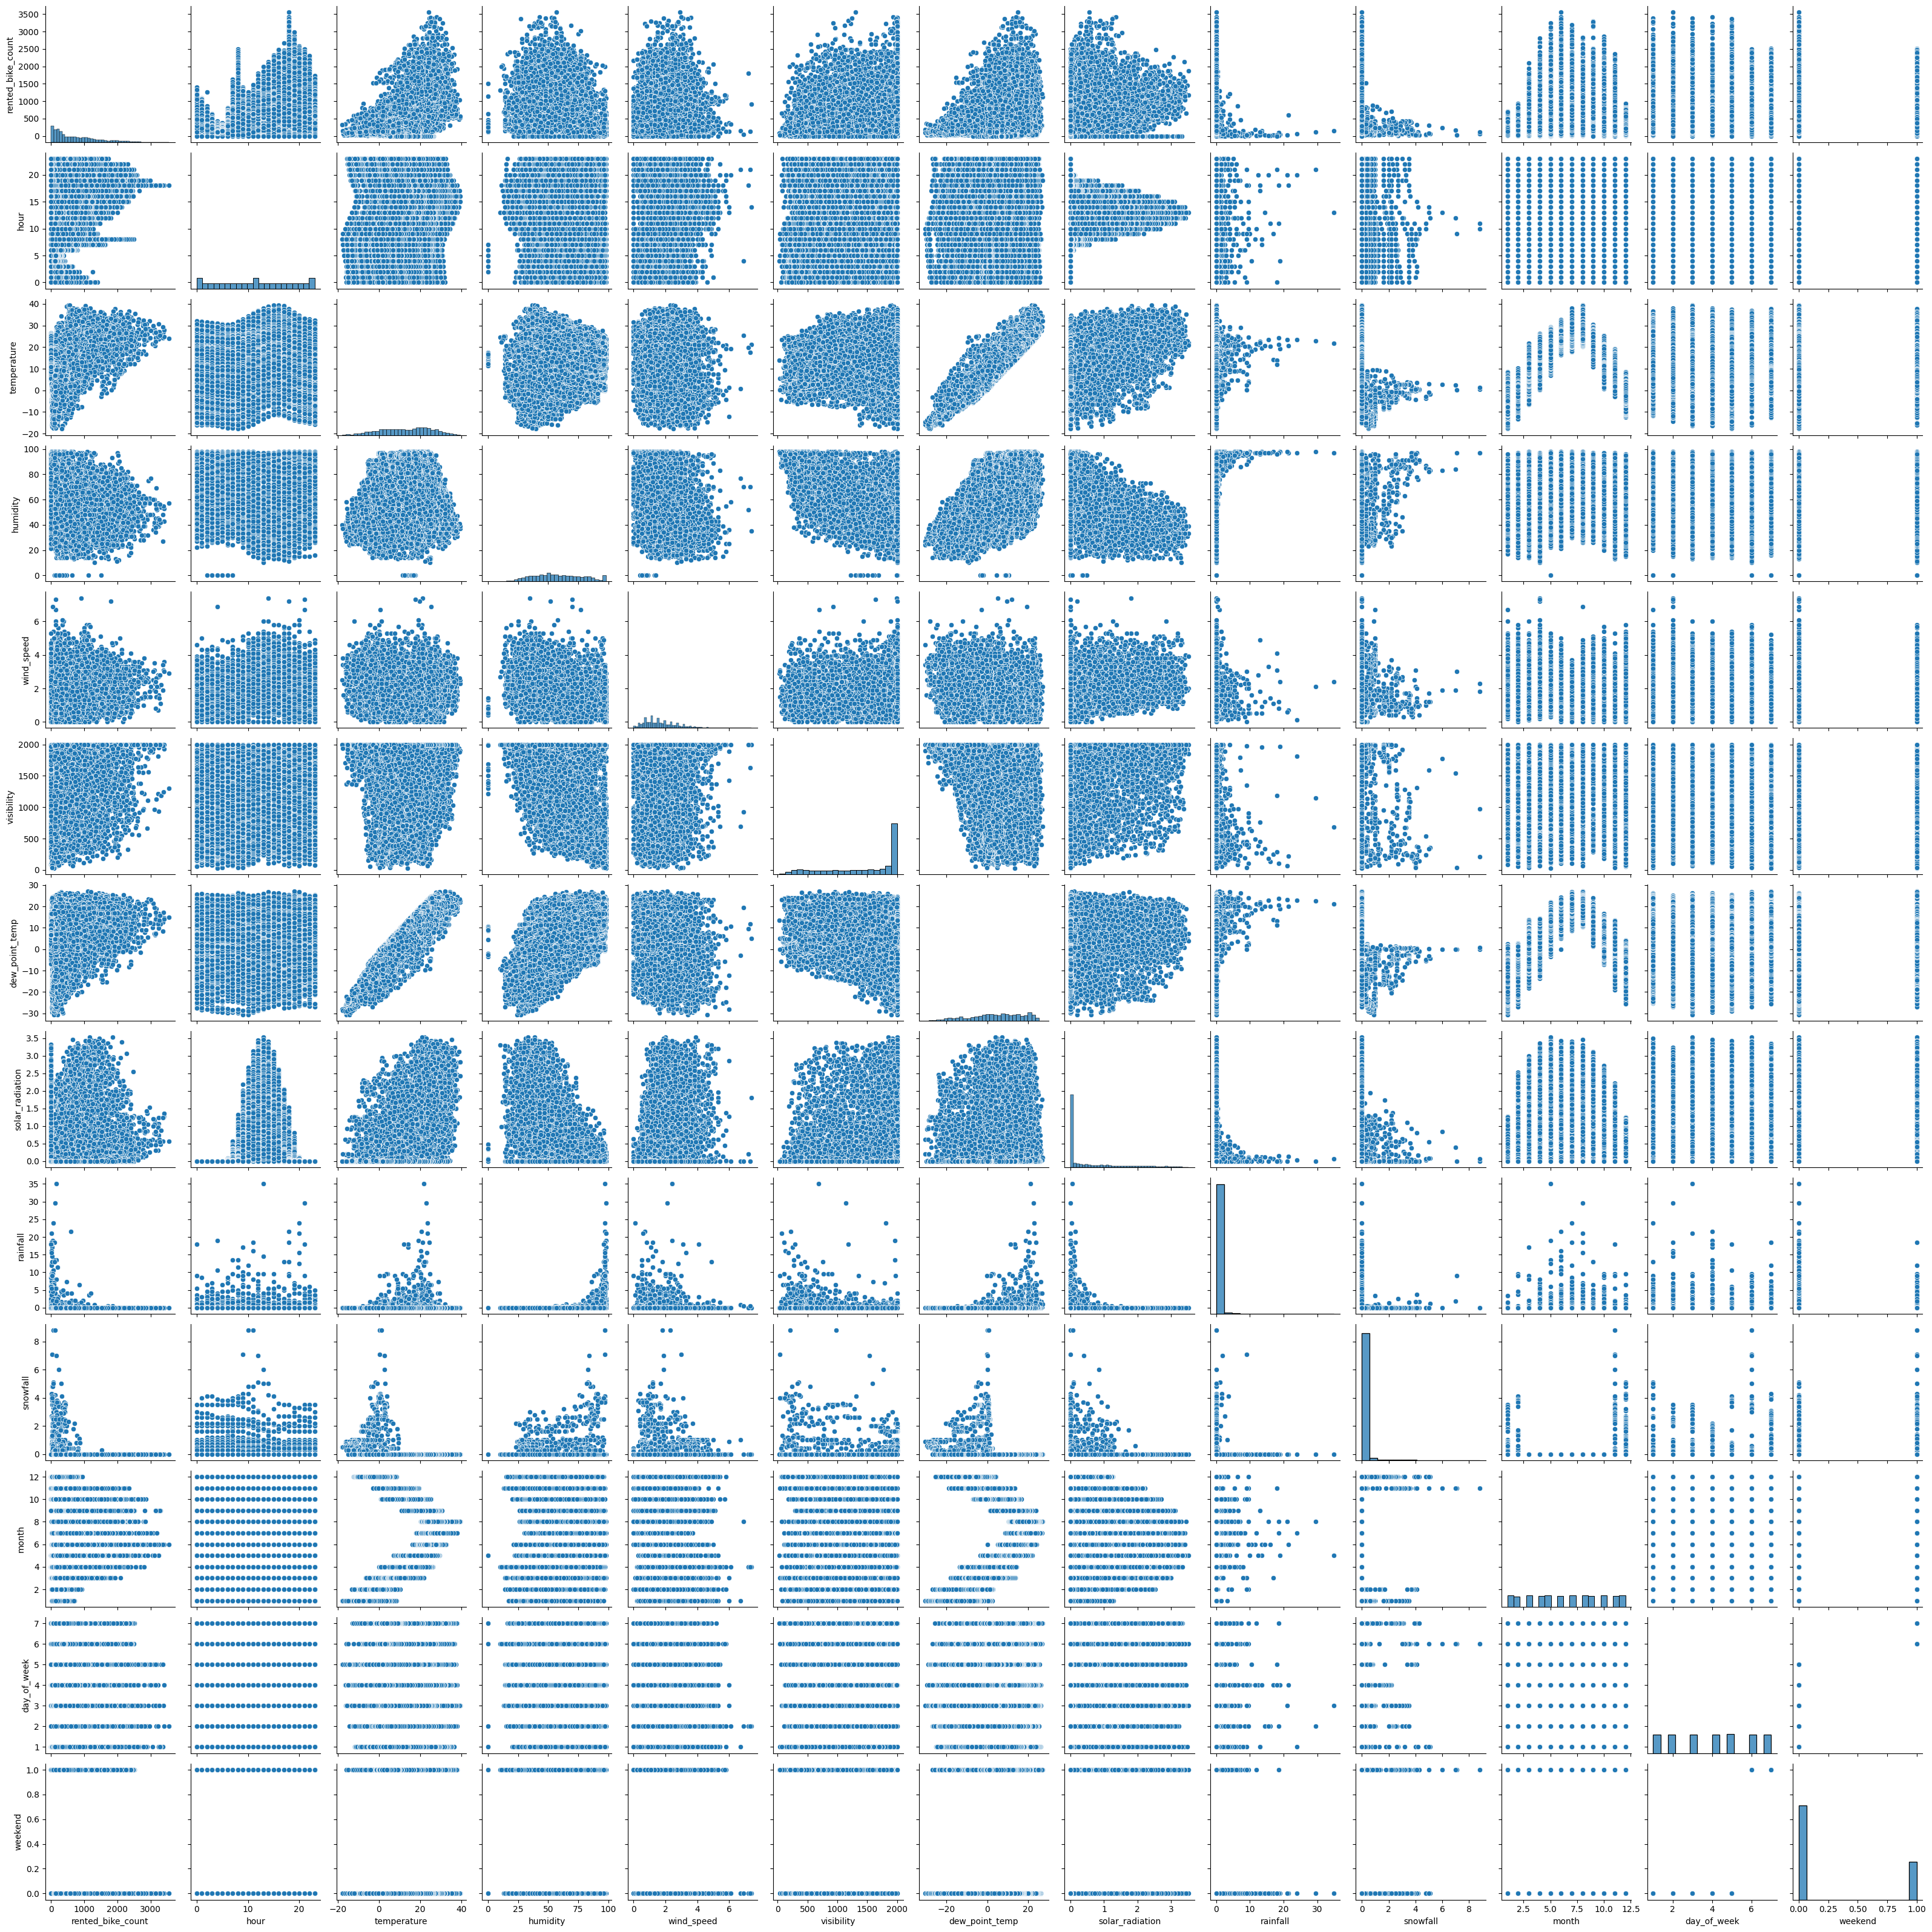

In [70]:
# Pair Plot visualization code
sns.pairplot(data_2)
plt.show()

##### **1. Why did you pick the specific chart?**

A pairplot, also known as a scatterplot matrix, is a visualization that allows you to visualize the relationships between all pairs of variables in a dataset. It is a useful tool for data exploration because it allows you to quickly see how all of the variables in a dataset are related to one another.

Thus, we used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### **2. What is/are the insight(s) found from the chart?**

From above pair plot we got to know that, there is not clear linear relationship between variables. other than dew point temp, temperature & solar radiation there is not any relationship.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Based on above chart experiments i have noticed that our dependent variable (Rented Bike Demand) does not seems to normally distributed so i have made hypothetical assumption that our data is normally distributed and for that i have decided to do statistical analysis.
1.   Rented Bike Demand in **hot weather** is higher compared to demand in **cold weather**.
2.   Rented Bike Demand during **rush hour** (7-9AM & 5-7PM) and **non-rush hour** are different.
3.   Average Rented Bike Demand is different in different seasons.

### **Hypothetical Statement - 1**

Rented Bike Demand in **hot weather** is higher compared to demand in **cold weather**.



#### **1. State Your research hypothesis as a null hypothesis and alternate hypothesis.**

Null Hypothesis: *H◦ : µcold = µhot*
  
Alternate Hypothesis : *H1 : µcold ≠ µhot*

Test Type: Two-sample t-test

#### **2. Perform an appropriate statistical test.**

In [71]:
# Perform Statistical Test to obtain P-Value
# Split the data into the 'hot' and 'cold' temperature groups
hot_temps = data_2[data_2['temperature'] >= 20]['rented_bike_count']
cold_temps = data_2[data_2['temperature'] < 20]['rented_bike_count']
print("Cold temperature Bike Demand Variance: ", np.var(cold_temps))
print("Hot temperature Bike Demand Variance: ", np.var(hot_temps))

Cold temperature Bike Demand Variance:  243195.07698899662
Hot temperature Bike Demand Variance:  505140.86009853514


In [72]:
# Sample sizes for different temperature groups
print("Hot Temp sample size:", hot_temps.shape[0])
print("Cold Temp sample size:", cold_temps.shape[0])

Hot Temp sample size: 2928
Cold Temp sample size: 5832


In [73]:
# Perform the t-test
import scipy
t_stat, p_val = scipy.stats.ttest_ind(hot_temps, cold_temps, equal_var=False)

if p_val < 0.05:
    print(f"Since p-value ({p_val}) is less than 0.05, we reject null hypothesis.\nHence, There is a significant difference in mean bike rentals between the 'hot' and 'cold' temperature groups.")
else:
  print(f"Since p-value ({p_val}) is greater than 0.05, we fail to reject null hypothesis.\nHence, There is no significant difference in mean bike rentals between the 'hot' and 'cold' temperature groups.")


Since p-value (0.0) is less than 0.05, we reject null hypothesis.
Hence, There is a significant difference in mean bike rentals between the 'hot' and 'cold' temperature groups.


##### **Which statistical test have you done to obtain P-Value?**

I have used Two sample T-test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and Mean Rented Bike counts different in hot temperatures and cold temperaures.

##### **Why did you choose the specific statistical test?**

The two sample t-test is used to determine if there is a significant difference between the means of two groups, making it an appropriate test for comparing the mean number of Rented Bike Count between the hot and cold temperature groups.

### **Hypothetical Statement - 2**

Rented Bike Demand during **rush hour** *(7-9AM & 5-7PM)* is higher compared to **non-rush hour**.

#### **1. State Your research hypothesis as a null hypothesis and alternate hypothesis.**

Null Hypothesis: *H◦ : µrush = µnon-rush*

Alternate Hypothesis : *H1 : µrush ≠ µnon-rush*

Test Type: Two-sample t-test

#### **2. Perform an appropriate statistical test.**

In [74]:
# Perform Statistical Test to obtain P-Value
# Create subsets of the data based on hour
rush_hour = data_2[(data_2['hour'] >= 7) & (data_2['hour'] <= 9) | (data_2['hour'] >= 17) & (data_2['hour'] <= 19)]['rented_bike_count']
non_rush_hour = data_2[~((data_2['hour'] >= 7) & (data_2['hour'] <= 9) | (data_2['hour'] >= 17) & (data_2['hour'] <= 19))]['rented_bike_count']
print("Rush Hour Bike Demand Variance: ", np.var(rush_hour))
print("Non-Rush Hour Bike Demand Variance: ", np.var(non_rush_hour))

Rush Hour Bike Demand Variance:  651191.7549925982
Non-Rush Hour Bike Demand Variance:  294088.66494823346


In [75]:
# Sample sizes for different hours
print("Rush Hour sample size:", rush_hour.shape[0])
print("Non-Rush Hour sample size:", non_rush_hour.shape[0])

Rush Hour sample size: 2190
Non-Rush Hour sample size: 6570


In [76]:
# Conduct a two-sample t-test to compare the mean bike rental demand during rush hour with the mean bike rental demand during non-rush hour times
t_stat, p_val = scipy.stats.ttest_ind(rush_hour, non_rush_hour, equal_var=False)

# Print the t-test results
# print('t-statistic:', t_stat)
# print('p-value:', p_val)

if p_val < 0.05:
    print(f"Since p-value ({p_val}) is less than 0.05, we reject null hypothesis.\nHence, There is a significant difference in mean bike rentals between the 'rush hour' and 'non-rush hour' times of day.")
else:
  print(f"Since p-value ({p_val}) is greater than 0.05, we fail to reject null hypothesis.\nHence, There is no significant difference in mean bike rentals between the 'rush hour' and 'non-rush hour' times of day.")


Since p-value (9.381784283723713e-104) is less than 0.05, we reject null hypothesis.
Hence, There is a significant difference in mean bike rentals between the 'rush hour' and 'non-rush hour' times of day.


##### **Which statistical test have you done to obtain P-Value?**

I have used Two sample T-test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and Mean Rented Bike counts different in rush hours and non-rush hours.

##### **Why did you choose the specific statistical test?**

The two sample t-test is used to determine if there is a significant difference between the means of two groups, making it an appropriate test for comparing the mean number of Rented Bike Count between the rush hours and non-rush hours.

### **Hypothetical Statement - 3**

Rented Bike Demand is different in different seasons with highest in summer and lowest in winter.

#### **1. State Your research hypothesis as a null hypothesis and alternate hypothesis.**

Null Hypothesis: *H◦*:
 No significant difference between rented bike counts for different seasons.

Alternate Hypothesis : *H1*:
 Significant difference between rented bike counts for different seasons.

Test Type: One-way ANOVA test

#### **2. Perform an appropriate statistical test.**

In [77]:
# Perform Statistical Test to obtain P-Value
# Sample sizes for different seasons
data_2.groupby('seasons')['rented_bike_count'].count()

seasons
Autumn    2184
Spring    2208
Summer    2208
Winter    2160
Name: rented_bike_count, dtype: int64

In [78]:
# Group the data by season and calculate the mean number of bike rentals for each season
season_means = data_2.groupby('seasons')['rented_bike_count'].mean()

# Conduct the ANOVA test
f_stat, p_value = scipy.stats.f_oneway(data_2.loc[data_2['seasons']=='Spring', 'rented_bike_count'],
                                  data_2.loc[data_2['seasons']=='Summer', 'rented_bike_count'],
                                  data_2.loc[data_2['seasons']=='Autumn', 'rented_bike_count'],
                                  data_2.loc[data_2['seasons']=='Winter', 'rented_bike_count'])

# Print the results
print('F-statistic:', f_stat)
print('p-value:', p_val)
print()

# Conduct Tukey's HSD test for detailed difference b/w each groups
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_results = pairwise_tukeyhsd(data_2['rented_bike_count'], data_2['seasons'])

# Print the Tukey HSD test results
print(tukey_results)

F-statistic: 776.4678149879506
p-value: 9.381784283723713e-104

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj   lower     upper   reject
--------------------------------------------------------
Autumn Spring  -89.5667   0.0 -134.0266  -45.1069   True
Autumn Summer  214.4754   0.0  170.0156  258.9352   True
Autumn Winter -594.0568   0.0 -638.7616  -549.352   True
Spring Summer  304.0421   0.0  259.7039  348.3803   True
Spring Winter   -504.49   0.0 -549.0739 -459.9062   True
Summer Winter -808.5322   0.0  -853.116 -763.9483   True
--------------------------------------------------------


##### **Which statistical test have you done to obtain P-Value?**

I have used One-way ANOVA test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and Mean Rented Bike counts are significantly different in different seasons.

##### **Why did you choose the specific statistical test?**

The one-way ANOVA test is used to determine if there is a significant difference between the means of more than two groups, making it an appropriate test for comparing the mean number of Rented Bike Count between different seasons.

## ***6. Feature Engineering & Data Pre-processing***

### **1. Handling Missing Values**

In [79]:
# Handling Missing Values & Missing Value Imputation
data_2.isna().sum().sum()

0

#### **What all missing value imputation techniques have you used and why did you use those techniques?**

There are no missing values to handle in the given dataset.

### **2. Handling Outliers**

In [80]:
# Handling Outliers & Outlier treatments

'''# Handling Outliers & Outlier treatments
# Removing outliers by Using IQR method:
q1, q3, median = data_2.rented_bike_count.quantile([0.25,0.75,0.5])
lower_limit = q1 - 1.5*(q3-q1)
upper_limit = q3 + 1.5*(q3-q1)
data_2['rented_bike_count'] = np.where(data_2['rented_bike_count'] > upper_limit, median,np.where(data_2['rented_bike_count'] < lower_limit,median,data_2['rented_bike_count']))

# Removing outliers by Capping:
for col in ['wind_speed','solar_radiation','rainfall','snowfall']:
  upper_limit = data_2[col].quantile(0.99)
  data_2[col] = np.where(data_2[col] > upper_limit, upper_limit, data_2[col])'''

"# Handling Outliers & Outlier treatments\n# Removing outliers by Using IQR method:\nq1, q3, median = data_2.rented_bike_count.quantile([0.25,0.75,0.5])\nlower_limit = q1 - 1.5*(q3-q1)\nupper_limit = q3 + 1.5*(q3-q1)\ndata_2['rented_bike_count'] = np.where(data_2['rented_bike_count'] > upper_limit, median,np.where(data_2['rented_bike_count'] < lower_limit,median,data_2['rented_bike_count']))\n\n# Removing outliers by Capping:\nfor col in ['wind_speed','solar_radiation','rainfall','snowfall']:\n  upper_limit = data_2[col].quantile(0.99)\n  data_2[col] = np.where(data_2[col] > upper_limit, upper_limit, data_2[col])"

##### **What all outlier treatment techniques have you used and why did you use those techniques?**


Here i used IQR method and Capping method, Based on IQR method i set Upper limit and Lower limit of rented bike count and convert those outliers into median values.

Also i have capp outliers upto 99th percentile and above that i convert those outliers into upper limit value.

**Note :-**
I have tried to remove the outliers but it has seen that there is drop in performance after removing the outliers around 10% drop in model performance
So, i have decided that i will perform the model without removing the outliers.

### **3. Categorical Encoding**

In [81]:
# Converting snowfall and rainfall to categorical attributes
data_2['snowfall'] = data_2['snowfall'].apply(lambda x: 1 if x>0 else 0)
data_2['rainfall'] = data_2['rainfall'].apply(lambda x: 1 if x>0 else 0)

# Encoding the visibility column
data_2['visibility'] = data_2['visibility'].apply(lambda x: 0 if 0<=x<=399 else (1 if 400<=x<=999 else 2))

# Encoding
data_2['func_day'] = np.where(data_2['func_day'] == 'Yes',1,0)
data_2['holiday'] = np.where(data_2['holiday'] == 'Holiday',1,0)

# One hot encoding
data_2 = pd.get_dummies(data_2, columns = ['hour', 'visibility', 'month', 'day_of_week' ])
data_2.columns

Index(['date', 'rented_bike_count', 'temperature', 'humidity', 'wind_speed',
       'dew_point_temp', 'solar_radiation', 'rainfall', 'snowfall', 'seasons',
       'holiday', 'func_day', 'weekend', 'hour_0', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23', 'visibility_0', 'visibility_1', 'visibility_2',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'day_of_week_5', 'day_of_week_6', 'day_of_week_7'],
      dtype='object')

#### **What all categorical encoding techniques have you used & why did you use those techniques?**

Since there are very few day on which there was snowfall / rainfall, it is in my interest that i convert these columns to binary categorical columns indicating whether there was rainfall / snowfall at that particular hour

For visibility

When

Visibility >= 20 Km ---> Clear (high visibility)

4 Km <= Visibility < 10 Km ---> Haze (medium visibility)

Visibility < 4 Km ---> Fog (low visibility)

Converting visibility based on the above mentioned threshold values. Since they are ordinal, we can encode them as 0 (low visibility), 1 (medium visibility), 2 (high visibility)

For func day and holiday There are two categories whether its holiday or func day so we use 0 and 1 for that.

For Hour, visibility, month & day of the week we use here one hot encoding.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [82]:
# Expand Contraction

#### 2. Lower Casing

In [83]:
# Lower Casing

#### 3. Removing Punctuations

In [84]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [85]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [86]:
# Remove Stopwords

In [87]:
# Remove White spaces

#### 6. Rephrase Text

In [88]:
# Rephrase Text

#### 7. Tokenization

In [89]:
# Tokenization

#### 8. Text Normalization

In [90]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [91]:
# POS Taging

#### 10. Text Vectorization

In [92]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### **4. Feature Manipulation & Selection**

#### **1. Feature Manipulation**

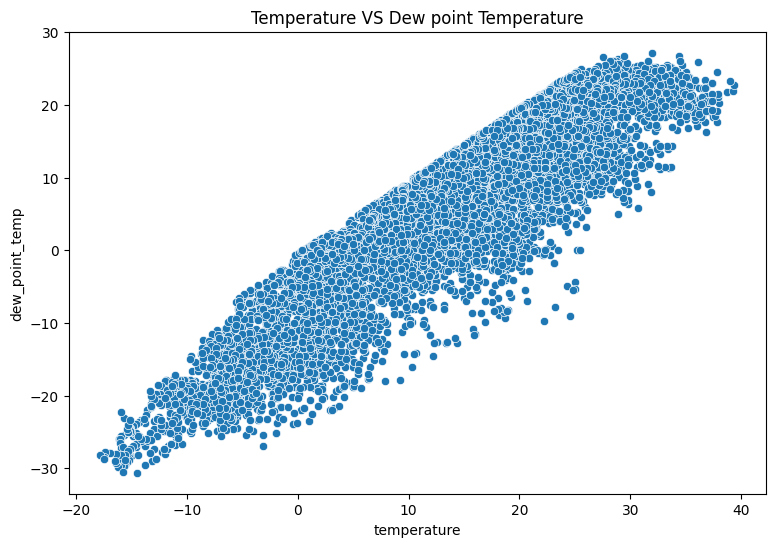

In [93]:
# Manipulate Features to minimize feature correlation and create new features

# We see that the temperature and dew temperature are highly correlated

# Plotting Scatter plot to visualize the relationship between
# temperature and dew point temperature
plt.figure(figsize=(9,6))
sns.scatterplot(x='temperature',y='dew_point_temp',data=data_2)
plt.xlabel('temperature')
plt.ylabel('dew_point_temp')
plt.title('Temperature VS Dew point Temperature')
plt.show()

In [94]:
# Correlation
data_2[['temperature','dew_point_temp']].corr()

temperature  dew_point_temp
temperature        1.000000        0.912798
dew_point_temp     0.912798        1.000000

In [95]:
# Creating new temperature column with 50% of both temp
data_2['temp'] = 0.5*data_2['temperature'] + 0.5*data_2['dew_point_temp']

#### **2. Feature Selection**

In [96]:
# Select your features wisely to avoid overfitting
features = [i for i in data_2.columns if i not in ['rented_bike_count','temperature','dew_point_temp']]
features

['date',
 'humidity',
 'wind_speed',
 'solar_radiation',
 'rainfall',
 'snowfall',
 'seasons',
 'holiday',
 'func_day',
 'weekend',
 'hour_0',
 'hour_1',
 'hour_2',
 'hour_3',
 'hour_4',
 'hour_5',
 'hour_6',
 'hour_7',
 'hour_8',
 'hour_9',
 'hour_10',
 'hour_11',
 'hour_12',
 'hour_13',
 'hour_14',
 'hour_15',
 'hour_16',
 'hour_17',
 'hour_18',
 'hour_19',
 'hour_20',
 'hour_21',
 'hour_22',
 'hour_23',
 'visibility_0',
 'visibility_1',
 'visibility_2',
 'month_1',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9',
 'month_10',
 'month_11',
 'month_12',
 'day_of_week_1',
 'day_of_week_2',
 'day_of_week_3',
 'day_of_week_4',
 'day_of_week_5',
 'day_of_week_6',
 'day_of_week_7',
 'temp']

In [97]:
# Remove multicollinearity by using VIF technique
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [98]:
continuous_variables = ['temperature', 'humidity', 'wind_speed', 'dew_point_temp', 'solar_radiation', 'temp']

In [99]:
continuous_feature_df = pd.DataFrame(data_2[continuous_variables])
continuous_feature_df

temperature  humidity  wind_speed  dew_point_temp  solar_radiation  \
0            -5.2        37         2.2           -17.6              0.0   
1            -5.5        38         0.8           -17.6              0.0   
2            -6.0        39         1.0           -17.7              0.0   
3            -6.2        40         0.9           -17.6              0.0   
4            -6.0        36         2.3           -18.6              0.0   
...           ...       ...         ...             ...              ...   
8755          4.2        34         2.6           -10.3              0.0   
8756          3.4        37         2.3            -9.9              0.0   
8757          2.6        39         0.3            -9.9              0.0   
8758          2.1        41         1.0            -9.8              0.0   
8759          1.9        43         1.3            -9.3              0.0   

       temp  
0    -11.40  
1    -11.55  
2    -11.85  
3    -11.90  
4    -12.30  
...     ...  
8755  -3.05  
8756  -3.25  
8757  -3.65  
8758  -3.85  
8759  -3.70  

[8760 rows x 6 columns]

In [100]:
calc_vif(data_2[[i for i in continuous_feature_df]])

variables       VIF
0      temperature       inf
1         humidity  3.728151
2       wind_speed  4.486642
3   dew_point_temp       inf
4  solar_radiation  2.619125
5             temp       inf

In [101]:
# Removing Temperature and dew point temperature
calc_vif(data_2[[i for i in continuous_feature_df if i not in ['dew_point_temp','temperature']]])

variables       VIF
0         humidity  3.539282
1       wind_speed  3.479585
2  solar_radiation  1.956713
3             temp  2.027904

In [102]:
# Dropping data, weekend, temperature and dew_point_temperature
data_2.drop(['date','weekend', 'dew_point_temp', 'temperature','seasons'],axis=1, inplace=True)
data_2.head()

rented_bike_count  humidity  wind_speed  solar_radiation  rainfall  \
0                254        37         2.2              0.0         0   
1                204        38         0.8              0.0         0   
2                173        39         1.0              0.0         0   
3                107        40         0.9              0.0         0   
4                 78        36         2.3              0.0         0   

   snowfall  holiday  func_day  hour_0  hour_1  ...  month_11  month_12  \
0         0        0         1    True   False  ...     False      True   
1         0        0         1   False    True  ...     False      True   
2         0        0         1   False   False  ...     False      True   
3         0        0         1   False   False  ...     False      True   
4         0        0         1   False   False  ...     False      True   

   day_of_week_1  day_of_week_2  day_of_week_3  day_of_week_4  day_of_week_5  \
0          False          False          False          False           True   
1          False          False          False          False           True   
2          False          False          False          False           True   
3          False          False          False          False           True   
4          False          False          False          False           True   

   day_of_week_6  day_of_week_7   temp  
0          False          False -11.40  
1          False          False -11.55  
2          False          False -11.85  
3          False          False -11.90  
4          False          False -12.30  

[5 rows x 55 columns]

##### **What all feature selection methods have you used  and why?**

I have used pearson correlation coefficient to check correlation between variables and also with dependent variable.

And also i check the multicollinearity using VIF and remove those who are having high VIF value.

##### **Which all features you found important and why?**

From above methods i have found that there is high correlation between temperature and dew point temperature. So, i take 50 % of the both and create new variable 'temp' by adding both of them.

### **5. Data Transformation**

#### **Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?**

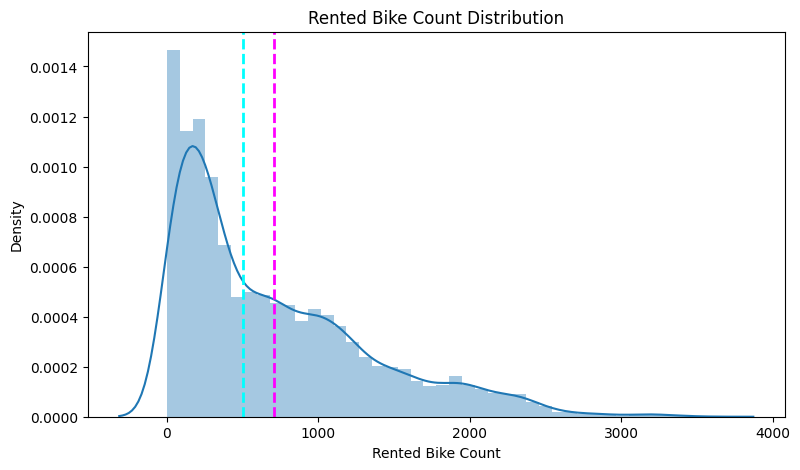

In [103]:
# Transform Your data
# Visualizing the distribution of the dependent variable - rental bike count
plt.figure(figsize=(9,5))
sns.distplot(data_2[dependent_variable])
plt.xlabel('Rented Bike Count')
plt.title('Rented Bike Count Distribution')
plt.axvline(data_2[dependent_variable[0]].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(data_2[dependent_variable[0]].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

In [104]:
# Skew of the dependent variable
data_2[dependent_variable].skew()

rented_bike_count    1.153428
dtype: float64

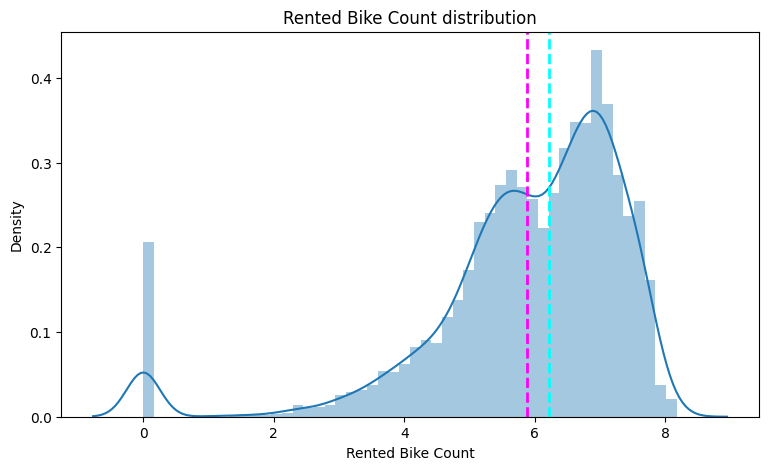

In [105]:
# Visualizing the distribution of dependent variable after log transformation
plt.figure(figsize=(9,5))
sns.distplot(np.log1p(data_2[dependent_variable]))
plt.xlabel('Rented Bike Count')
plt.title('Rented Bike Count distribution')
plt.axvline(np.log1p(data_2['rented_bike_count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(np.log1p(data_2['rented_bike_count']).median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

In [106]:
# Skew of the dependent variable after log transformation
np.log1p(data_2[dependent_variable]).skew()

rented_bike_count   -1.832199
dtype: float64

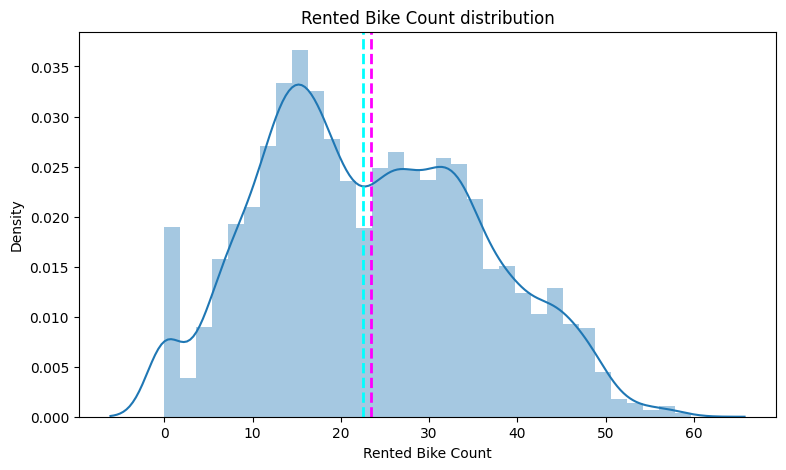

In [107]:
# Visualizing the distribution of dependent variable after sqrt transformation
plt.figure(figsize=(9,5))
sns.distplot(np.sqrt(data_2[dependent_variable]))
plt.xlabel('Rented Bike Count')
plt.title('Rented Bike Count distribution')
plt.axvline(np.sqrt(data_2['rented_bike_count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(np.sqrt(data_2['rented_bike_count']).median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

In [108]:
# Skew of the dependent variable after sqrt transformation
np.sqrt(data_2[dependent_variable]).skew()

rented_bike_count    0.237362
dtype: float64

In [109]:
# Defining dependent and independent variables
X = data_2.drop('rented_bike_count',axis=1)
y = np.sqrt(data_2[dependent_variable])

In [110]:
features

['date',
 'humidity',
 'wind_speed',
 'solar_radiation',
 'rainfall',
 'snowfall',
 'seasons',
 'holiday',
 'func_day',
 'weekend',
 'hour_0',
 'hour_1',
 'hour_2',
 'hour_3',
 'hour_4',
 'hour_5',
 'hour_6',
 'hour_7',
 'hour_8',
 'hour_9',
 'hour_10',
 'hour_11',
 'hour_12',
 'hour_13',
 'hour_14',
 'hour_15',
 'hour_16',
 'hour_17',
 'hour_18',
 'hour_19',
 'hour_20',
 'hour_21',
 'hour_22',
 'hour_23',
 'visibility_0',
 'visibility_1',
 'visibility_2',
 'month_1',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9',
 'month_10',
 'month_11',
 'month_12',
 'day_of_week_1',
 'day_of_week_2',
 'day_of_week_3',
 'day_of_week_4',
 'day_of_week_5',
 'day_of_week_6',
 'day_of_week_7',
 'temp']

###**I have ploted distribution plot and also i did normality test and i have found that the data is not normally distributed, it needs transformation.**

So, first i have calculate the skewness value and i have found that the rented bike attribute is positively skewed so i used log transfomation but it affected negatively.

So, i finally used square root transformation & now the data looks normally distrubuted & skewness is also reduced.

### **6. Data Scaling**

In [111]:
features = [i for i in data_2.columns if i not in ['rented_bike_count']]

# Scaling your data
scaler = StandardScaler()
X = scaler.fit_transform(data_2[features])

##### **Which method have you used to scale you data and why?**

In this i have different independent features of different scale so i have used standard scalar method to scale our independent features into one scale.

### **7. Dimesionality Reduction**

In [112]:
# Processed Dataset shape (rows, columns)
data_2.shape

(8760, 55)

##### **Do you think that dimensionality reduction is needed? Explain Why?**

With 55 columns (independent features) and 8760 rows, and after doing all the feature engineering steps like removing multicolinearity, feature selection manupulations etc. I don't think I need dimensionality reduction here.

Essentially where high dimensions are a problem or where it is a particular point in the algorithm to dimension reduction.

Answer Here.

In [113]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### **8. Data Splitting**

In [114]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 0)

##### **What data splitting ratio have you used and why?**

To train the model i have split the data into train and test using train_test_split method.

There are two competing concerns: with less training data, your parameter estimates have greater variance. With less testing data, your performance statistic will have greater variance. Broadly speaking you should be concerned with dividing data such that neither variance is too high, which is more to do with the absolute number of instances in each category rather than the percentage.

If we have a total of 100 instances, we should probably stick with cross validation as no single split is going to give you satisfactory variance in our estimates. If we have 100,000 instances, it doesn't really matter whether we choose an 80:20 split or a 90:10 split.

It is surprising to find out that 80/20 is quite a commonly occurring ratio, often referred to as the Pareto principle.

So, in this case i have split 80% of the data into train and 20% into test.

### **9. Handling Imbalanced Dataset**

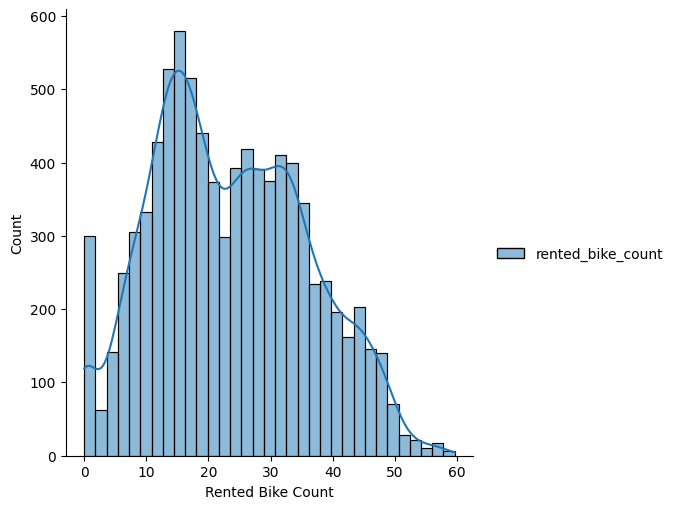

In [115]:
# Distribution of Rented Bike Count (target variable)
_ = sns.displot(y, kde=True)
plt.xlabel('Rented Bike Count')
plt.show()

##### **Do you think the dataset is imbalanced? Explain Why.**

Looking at the distribution of traget variable (i.e., Rented Bike Count), values are not concentrated in a narrow range, and is normally distributed accross wide range of values. So the dataset is not imbalanced.

In [116]:
# Handling Imbalanced Dataset (If needed)

##### **What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)**

Answer Here.

## ***7. ML Model Implementation***

In [117]:
# Defining a function to print evaluation matrix
def evaluate_model(model, y_test, y_pred):

  '''takes model, y test and y pred values to print evaluation metrics, plot the actual and predicted values,
  plot the top 20 important features, and returns a list of the model scores'''

  # Squring the y test and and pred as we have used sqrt transformation
  y_t = np.square(y_test)
  y_p = np.square(y_pred)
  y_train2 = np.square(y_train)
  y_train_pred = np.square(model.predict(X_train))

  # Calculating Evaluation Matrix
  mse = mean_squared_error(y_t,y_p)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_t,y_p)
  r2_train = r2_score(y_train2, y_train_pred)
  r2 = r2_score(y_t,y_p)
  r2_adjusted = 1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))

  # Printing Evaluation Matrix
  print("MSE :" , mse)
  print("RMSE :" ,rmse)
  print("MAE :" ,mae)
  print("Train R2 :" ,r2_train)
  print("Test R2 :" ,r2)
  print("Adjusted R2 : ", r2_adjusted)


  # plot actual and predicted values
  plt.figure(figsize=(13,4))
  plt.plot((y_p)[:100])
  plt.plot((np.array(y_t)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Bike Count', fontsize=15)

  try:
    importance = model.feature_importances_
  except:
    importance = model.coef_
  importance = np.absolute(importance)
  if len(importance)==len(features):
    pass
  else:
    importance = importance[0]

  # Feature importances
  feat = pd.Series(importance, index=features)
  plt.figure(figsize=(9,7))
  plt.title('Feature Importances (top 20) for '+str(model), fontsize = 15)
  plt.xlabel('Relative Importance')
  feat.nlargest(20).plot(kind='barh')


  model_score = [mse,rmse,mae,r2_train,r2,r2_adjusted]
  return model_score

In [118]:
# Create a score dataframe
score = pd.DataFrame(index = ['MSE', 'RMSE', 'MAE', 'Train R2', 'Test R2', 'Adjusted R2'])

### **ML Model - 1 : Linear Regression**

In [119]:
# Import the LinearRegression class
reg = LinearRegression()

# Fit the linear regression model to the training data
reg.fit(X_train, y_train)

# Predict on the model
y_pred_li = reg.predict(X_test)

#### **1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

MSE : 88155.92394630784
RMSE : 296.91063292901424
MAE : 202.02864002874753
Train R2 : 0.7841154772748078
Test R2 : 0.7893639999889227
Adjusted R2 :  0.7826613812496191


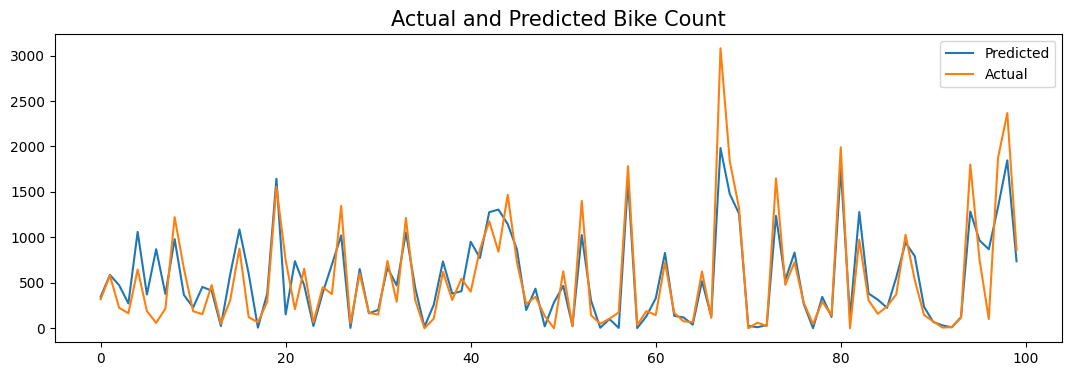

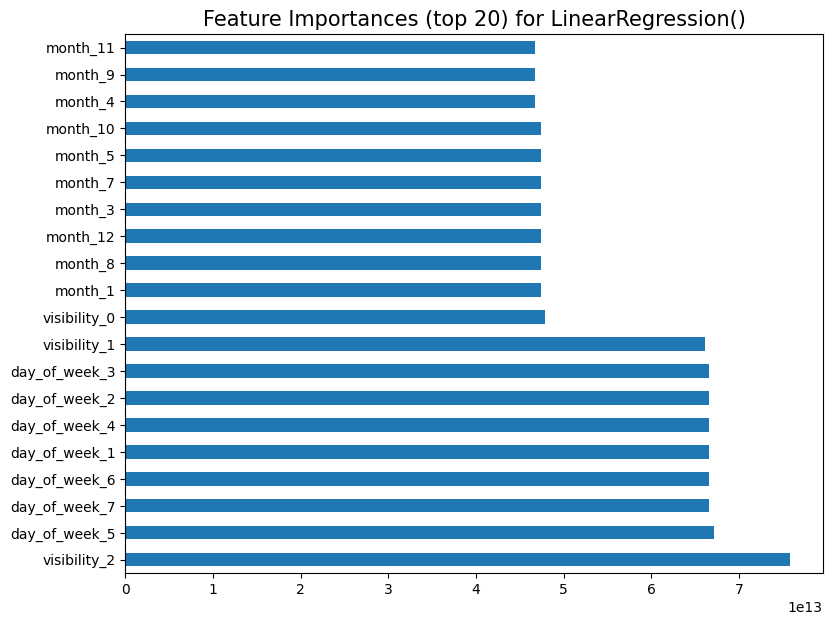

In [120]:
# Visualizing evaluation Metric Score chart
linear_score = evaluate_model(reg, y_test,y_pred_li)
# Evaluation Metric Score chart
score['Linear regression'] = linear_score

In [121]:
score

Linear regression
MSE               88155.923946
RMSE                296.910633
MAE                 202.028640
Train R2              0.784115
Test R2               0.789364
Adjusted R2           0.782661

#### **2. Cross- Validation & Hyperparameter Tuning**

In [122]:
# Define the model
reg = LinearRegression()

# Define the parameters to be optimized
param_grid = {'fit_intercept': [True, False]}

# Perform grid search
grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             return_train_score=True, scoring='r2')

In [123]:
# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best R2 score: ", grid_search.best_score_)

Best parameters:  {'fit_intercept': True}
Best R2 score:  0.8032244118023325


In [124]:
# Use the best parameter to train the model
best_reg = grid_search.best_estimator_
best_reg.fit(X_train, y_train)

LinearRegression()

In [125]:
# Predict on test data
y_pred_li2 = best_reg.predict(X_test)

MSE : 88155.92394630784
RMSE : 296.91063292901424
MAE : 202.02864002874753
Train R2 : 0.7841154772748078
Test R2 : 0.7893639999889227
Adjusted R2 :  0.7826613812496191


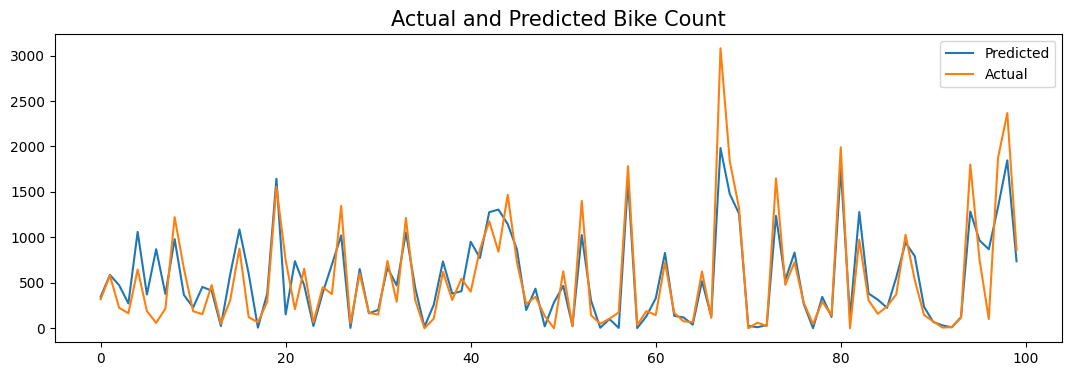

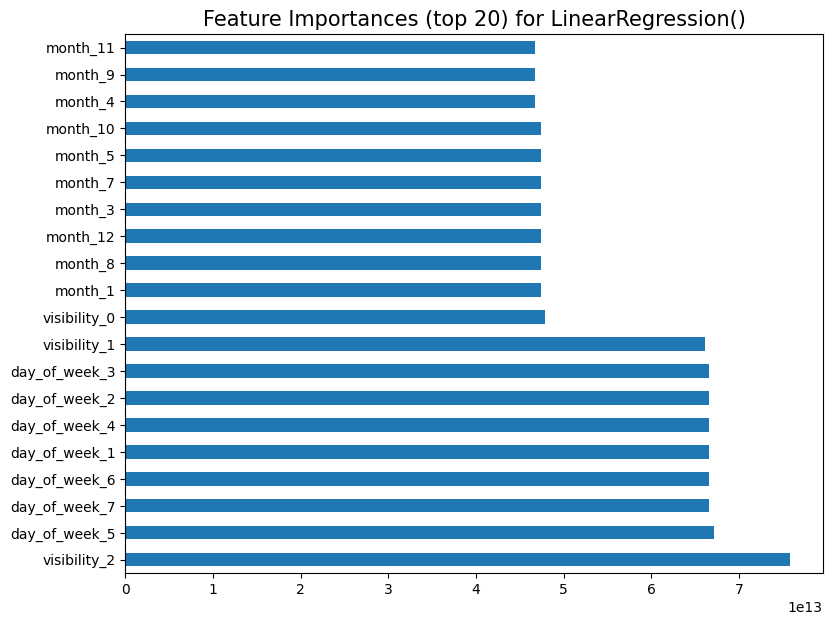

In [126]:
# Visualizing evaluation Metric Score chart
linear_score2 = evaluate_model(best_reg, y_test,y_pred_li2)

In [127]:
score['Linear regression tuned'] = linear_score2
score

Linear regression  Linear regression tuned
MSE               88155.923946             88155.923946
RMSE                296.910633               296.910633
MAE                 202.028640               202.028640
Train R2              0.784115                 0.784115
Test R2               0.789364                 0.789364
Adjusted R2           0.782661                 0.782661

##### **Which hyperparameter optimization technique have you used and why?**

GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort i have used GridSearchCV.

##### **Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

For training data, I found R2 score of 0.784428 & 88090.659090 and 201.806803 as MSE and MAE respectively.

For testing data, I found R2 score of 0.789520 & 88090.659090 and 201.806803 as MSE and MAE respectively.

For Both training and testing data, no improvement is seen.

### **ML Model - 2 : Lasso Regression**

In [128]:
# Import the Lasso Regression class
lasso = Lasso()

# Fit the lasso regression model to your training data
lasso.fit(X_train, y_train)

# Predict on the model
y_pred_lasso1 = lasso.predict(X_test)

#### **1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

MSE : 199251.13943499743
RMSE : 446.37555873389556
MAE : 303.758212165632
Train R2 : 0.5201240107717402
Test R2 : 0.5239178363804666
Adjusted R2 :  0.5087684923407172


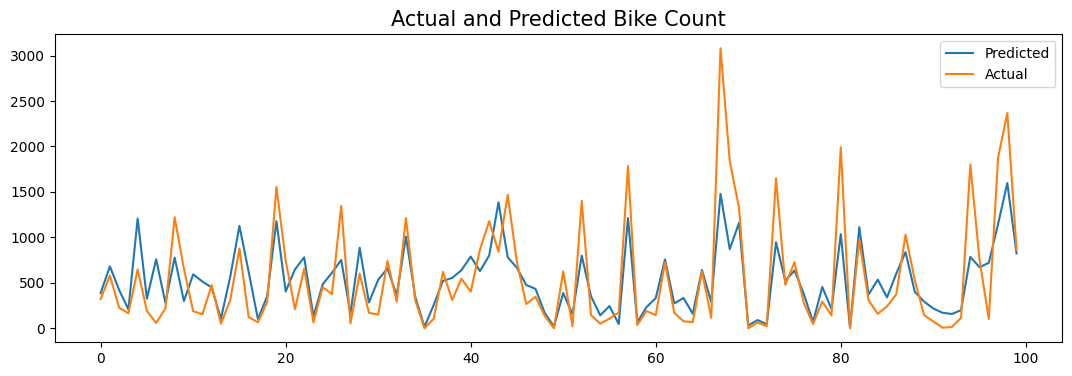

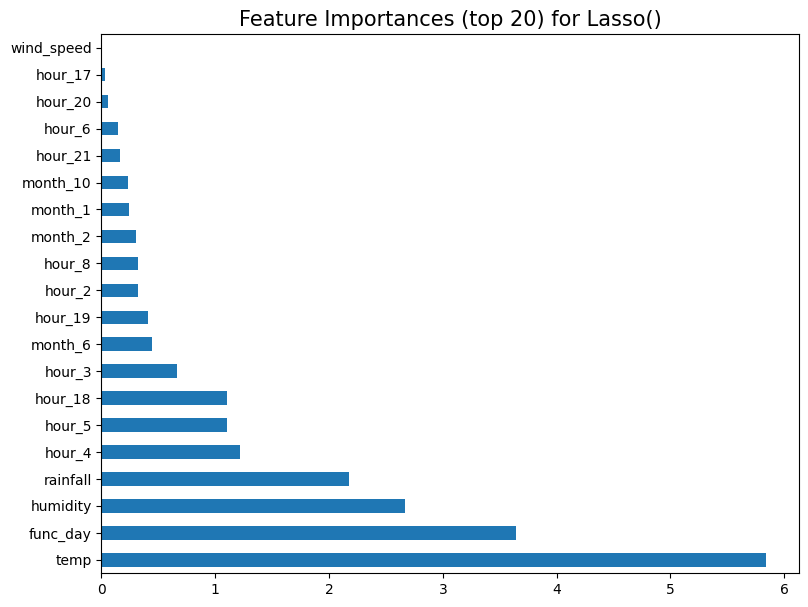

In [129]:
# Visualizing evaluation Metric Score chart
lasso_score = evaluate_model(lasso, y_test,y_pred_lasso1)
score['Lasso regression'] = lasso_score

In [130]:
score

Linear regression  Linear regression tuned  Lasso regression
MSE               88155.923946             88155.923946     199251.139435
RMSE                296.910633               296.910633        446.375559
MAE                 202.028640               202.028640        303.758212
Train R2              0.784115                 0.784115          0.520124
Test R2               0.789364                 0.789364          0.523918
Adjusted R2           0.782661                 0.782661          0.508768

It is seen that using Lasso regression analysis the performance of the model has drop down. So i will try to tuned the model.



#### **2. Cross- Validation & Hyperparameter Tuning**

In [131]:
# Define the model
lasso = Lasso()

# Define the parameters to be optimized & Perform grid search
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

# Fitting model
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [132]:
# Getting optimum parameters
print("The optimum alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The optimum alpha value is found out to be : {'alpha': 0.0001}

Using  {'alpha': 0.0001}  the negative mean squared error is:  -30.34188545869439


In [133]:
# Import the Lasso Regression class with best alpha
lasso = Lasso(alpha = lasso_regressor.best_params_['alpha'])

# Fit the lasso regression model to your training data
lasso.fit(X_train, y_train)

# Predict the model
y_pred_lassocv = lasso.predict(X_test)


MSE : 88358.33989461442
RMSE : 297.25130764155506
MAE : 201.70425481228804
Train R2 : 0.7834759534324424
Test R2 : 0.7888803559661375
Adjusted R2 :  0.7821623472579298


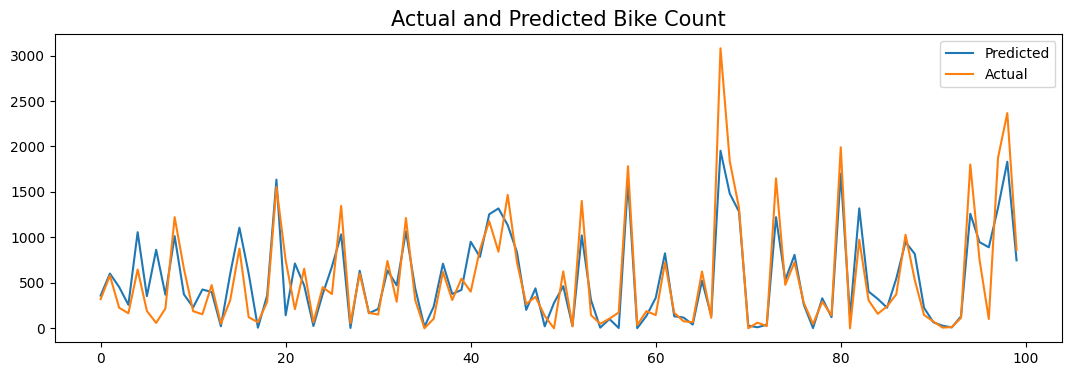

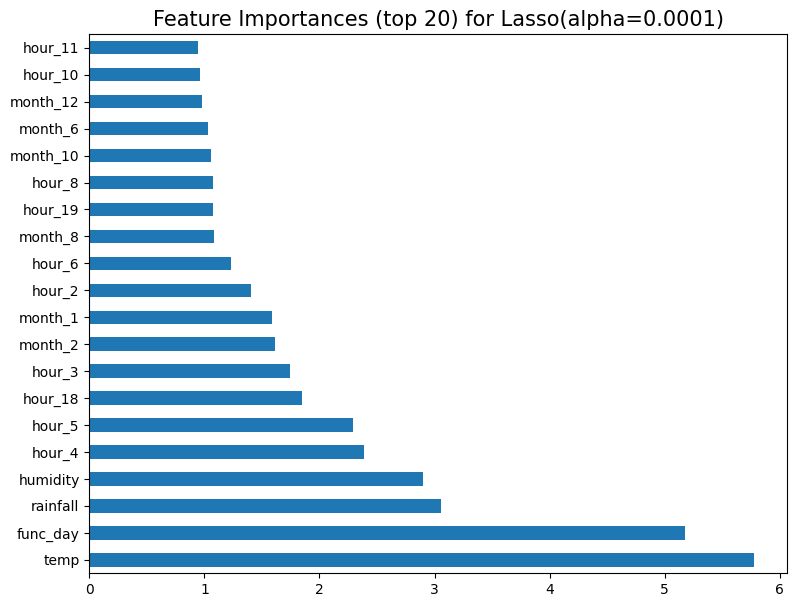

In [134]:
#Evaluation matrices for Lasso regression
lasso2 = evaluate_model(lasso, y_test,y_pred_lassocv)

name = 'Lasso with alpha = ' + str(lasso_regressor.best_params_['alpha'])

score[name] = lasso2

##### **Which hyperparameter optimization technique have you used and why?**

GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort i have used GridSearchCV.

##### **Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

In [135]:
score

Linear regression  Linear regression tuned  Lasso regression  \
MSE               88155.923946             88155.923946     199251.139435   
RMSE                296.910633               296.910633        446.375559   
MAE                 202.028640               202.028640        303.758212   
Train R2              0.784115                 0.784115          0.520124   
Test R2               0.789364                 0.789364          0.523918   
Adjusted R2           0.782661                 0.782661          0.508768   

             Lasso with alpha = 0.0001  
MSE                       88358.339895  
RMSE                        297.251308  
MAE                         201.704255  
Train R2                      0.783476  
Test R2                       0.788880  
Adjusted R2                   0.782162

After tuning i have seen that there is increse in performance from 52% to 78%.

#### **3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.**

RMSE & MSE are measuring the average squared values between the predicted and actual values.

Whereas R2 score is measure how well the model fits the data.

In a business context, a low RMSE and high R2 score would indicate that the model is making accurate predictions and is a good fit for the data. This would be desirable for a business because it would mean that the model is able to provide useful insights and make accurate predictions about future outcomes.

### **ML Model - 3 : Decision Tree**

In [136]:
# Import Decision Tree Regressor class
dt = DecisionTreeRegressor(random_state=1)

# Fit the Decision Tree model to your training data
dt.fit(X_train,y_train)

# Predict on the model
y_pred_dt1 = dt.predict(X_test)

#### **1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

MSE : 73491.68150684932
RMSE : 271.09349218830266
MAE : 152.0673515981735
Train R2 : 1.0
Test R2 : 0.824402114642698
Adjusted R2 :  0.8188144388564315


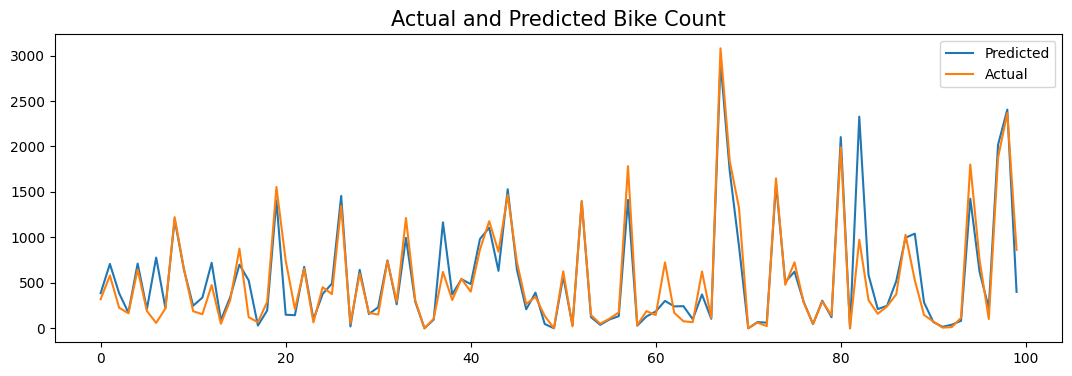

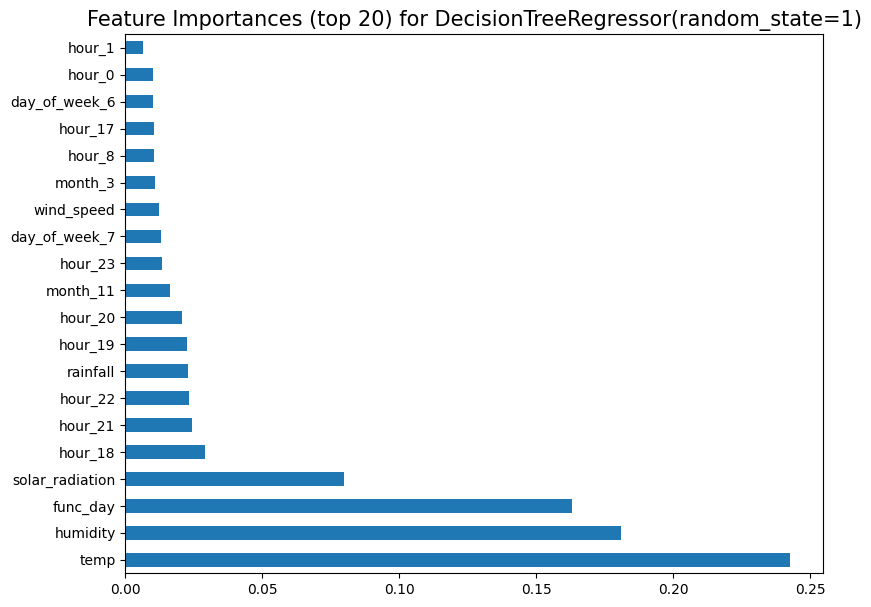

In [137]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(dt, y_test,y_pred_dt1)
score['Decision tree'] = result

In [138]:
score

Linear regression  Linear regression tuned  Lasso regression  \
MSE               88155.923946             88155.923946     199251.139435   
RMSE                296.910633               296.910633        446.375559   
MAE                 202.028640               202.028640        303.758212   
Train R2              0.784115                 0.784115          0.520124   
Test R2               0.789364                 0.789364          0.523918   
Adjusted R2           0.782661                 0.782661          0.508768   

             Lasso with alpha = 0.0001  Decision tree  
MSE                       88358.339895   73491.681507  
RMSE                        297.251308     271.093492  
MAE                         201.704255     152.067352  
Train R2                      0.783476       1.000000  
Test R2                       0.788880       0.824402  
Adjusted R2                   0.782162       0.818814

From the decision tree algorithm i got train R2 score is 1 and test R2 score is 82% which shows the overfitting condition on train dataset.

So, i have decided to tune the data using GridSearchCV.

#### **2. Cross- Validation & Hyperparameter Tuning**

In [139]:
# Regressor
dt_model = DecisionTreeRegressor(random_state=1)

# Hyperparameter Grid
grid = {'max_depth' : [8,10,12,14,16],
        'min_samples_split' : np.arange(35,50),
        'min_samples_leaf' : np.arange(22,31,2)}

# Fitting model with hypertuned paramaters using grid search
dt_gridsearch = GridSearchCV(dt_model,
                             grid,
                             cv=6,
                             scoring= 'neg_root_mean_squared_error')
dt_gridsearch.fit(X_train,y_train)
dt_best_params = dt_gridsearch.best_params_

In [140]:
dt_best_params

{'max_depth': 16, 'min_samples_leaf': 22, 'min_samples_split': 35}

In [141]:
# Building Decision Tree model with best parameters
dt_model = DecisionTreeRegressor(max_depth=dt_best_params['max_depth'],
                                 min_samples_leaf=dt_best_params['min_samples_leaf'],
                                 min_samples_split=dt_best_params['min_samples_split'],
                                 random_state=1)

In [142]:
# Fitting model
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=16, min_samples_leaf=22, min_samples_split=35,
                      random_state=1)

In [143]:
# Predict on the model
y_pred_dt = dt_model.predict(X_test)

MSE : 89557.65707345174
RMSE : 299.2618536891258
MAE : 184.41649011155485
Train R2 : 0.8375934856837123
Test R2 : 0.7860147587154215
Adjusted R2 :  0.7792055642373029


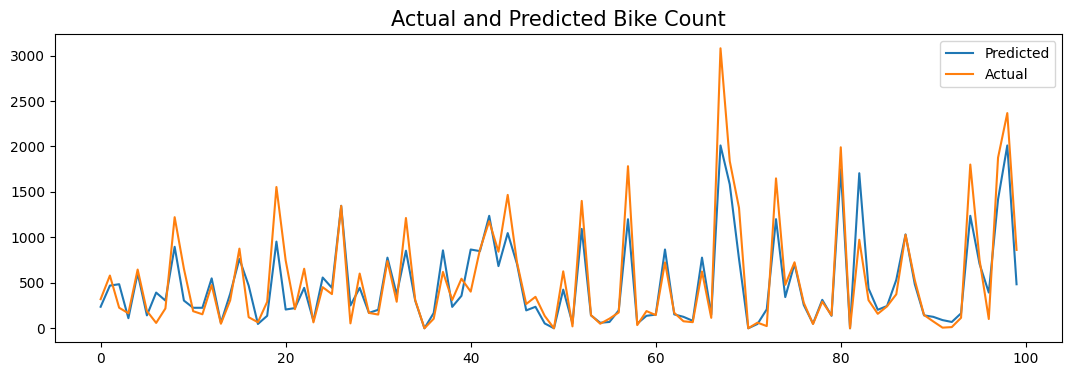

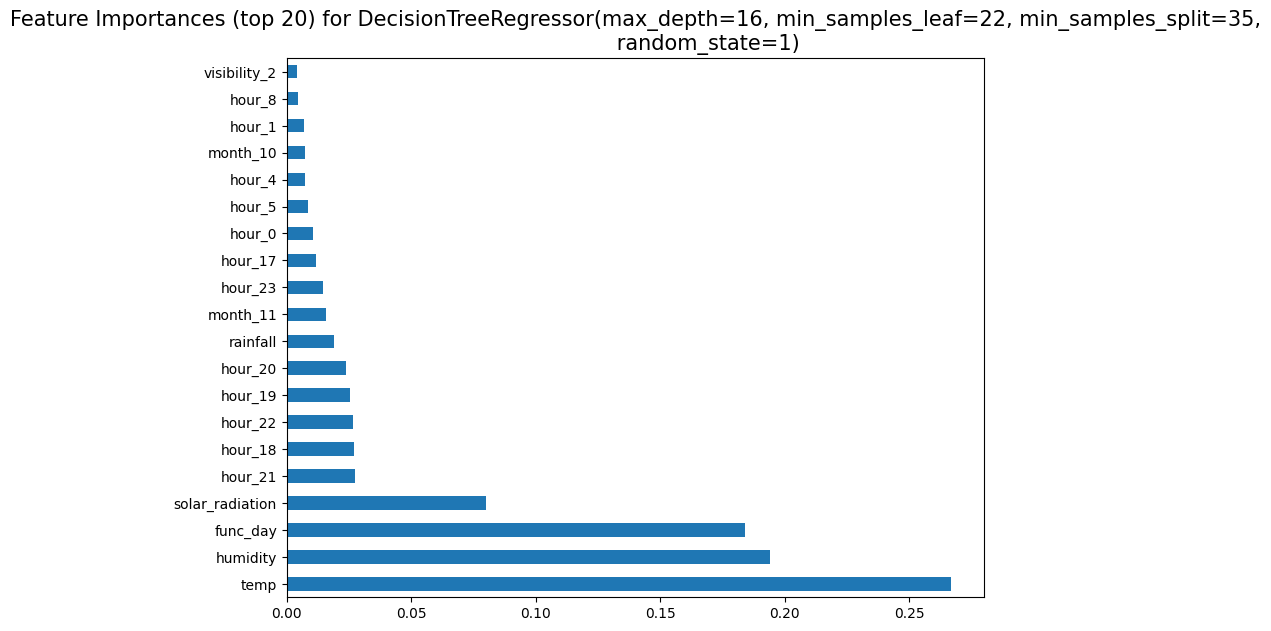

In [144]:
# Evaluation matrices for DecisionTree
result = evaluate_model(dt_model, y_test,y_pred_dt)
score['Decision tree tuned'] = result

In [145]:
'''# Decision tree diagram
graph = Source(tree.export_graphviz(dt_model,
                                    out_file=None,
                                    feature_names=features,
                                    filled= True))
display(SVG(graph.pipe(format='svg')))'''

"# Decision tree diagram\ngraph = Source(tree.export_graphviz(dt_model,\n                                    out_file=None,\n                                    feature_names=features,\n                                    filled= True))\ndisplay(SVG(graph.pipe(format='svg')))"

##### **Which hyperparameter optimization technique have you used and why?**

GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort we have used GridSearchCV.

##### **Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

In [146]:
score

Linear regression  Linear regression tuned  Lasso regression  \
MSE               88155.923946             88155.923946     199251.139435   
RMSE                296.910633               296.910633        446.375559   
MAE                 202.028640               202.028640        303.758212   
Train R2              0.784115                 0.784115          0.520124   
Test R2               0.789364                 0.789364          0.523918   
Adjusted R2           0.782661                 0.782661          0.508768   

             Lasso with alpha = 0.0001  Decision tree  Decision tree tuned  
MSE                       88358.339895   73491.681507         89557.657073  
RMSE                        297.251308     271.093492           299.261854  
MAE                         201.704255     152.067352           184.416490  
Train R2                      0.783476       1.000000             0.837593  
Test R2                       0.788880       0.824402             0.786015  
Adjusted R2                   0.782162       0.818814             0.779206

From the above tuned Decision tree regression, it has seen that earlier that we have faced overfitting condition. After tuning it there is no such condition and it looks like model performs with good accuracy around 83% on train and 78% on test data.

#### **Plot R2 scores for each model**

In [147]:
score.columns

Index(['Linear regression', 'Linear regression tuned', 'Lasso regression',
       'Lasso with alpha = 0.0001', 'Decision tree', 'Decision tree tuned'],
      dtype='object')

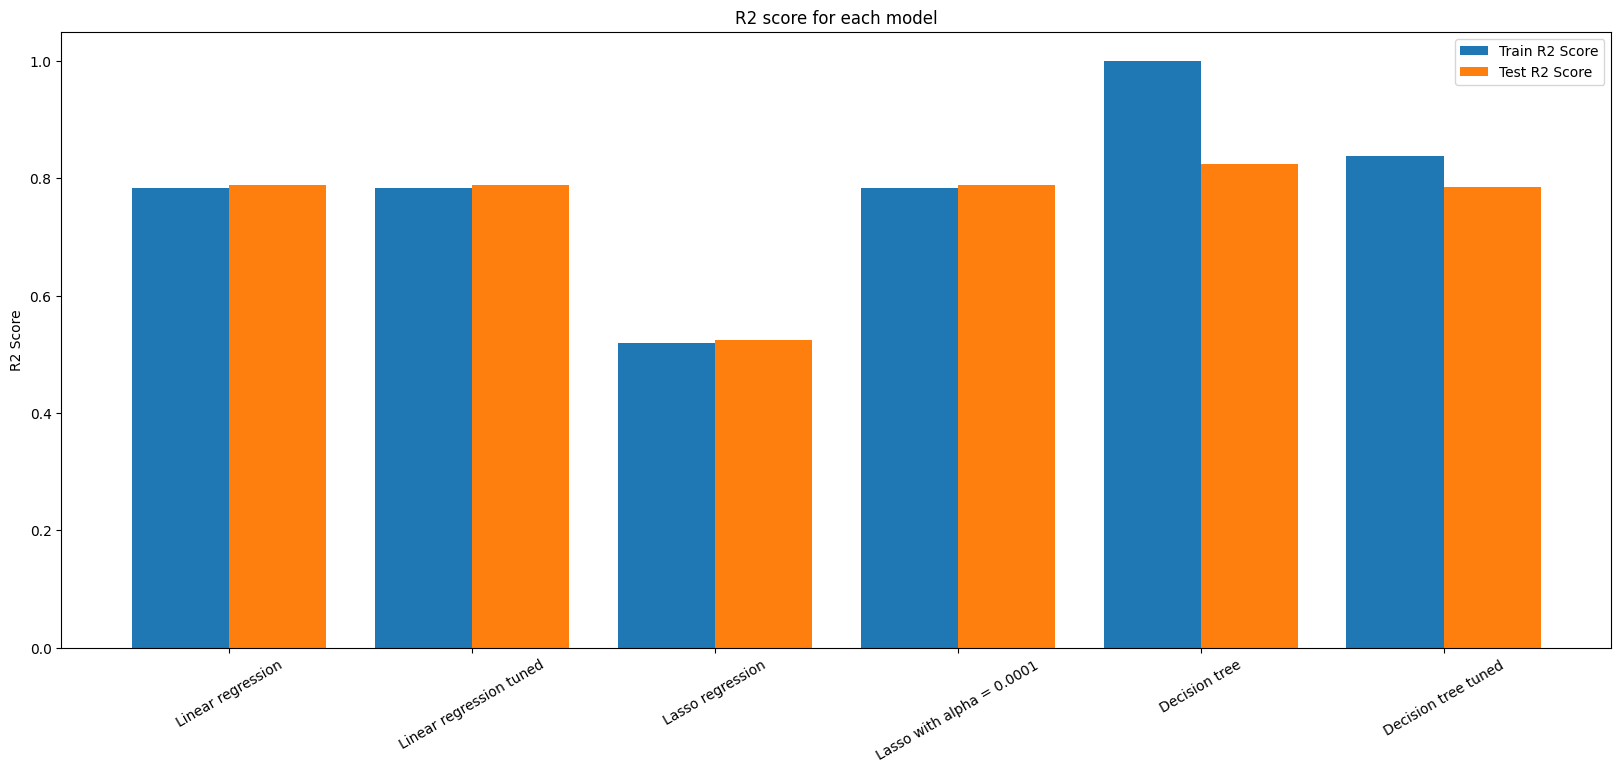

In [148]:
# R2 Scores plot

models = list(score.columns)
train = score.iloc[-3,:]
test = score.iloc[-2,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(20,8))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train R2 Score')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test R2 Score')


plt.xticks(X_axis, models, rotation=30)
plt.ylabel("R2 Score")
plt.title("R2 score for each model")
plt.legend()
plt.show()


### **1. Which Evaluation metrics did you consider for a positive business impact and why?**


On the basis of all the model i have decided to select R2 score Evaluation matrics which shows the accuracy of the model which is very good indicator to check the feasibility of the model.

### **2. Which ML model did you choose from the above created models as your final prediction model and why?**

I have ran 3 models like linear regression, lasso regression & decision tree but amongst them I have selected decision tree regressor as I achieved 83% training accuracy and 78% testing accuracy.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [149]:
# Save the File
import pickle
# Save the model to a pickle file
with open("dt_model.pkl", "wb") as f:
  pickle.dump(dt_model, f)

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [150]:
# Load the model from the pickle file
with open("dt_model.pkl", "rb") as f:
    loaded_dt_model = pickle.load(f)

new_test_preds = loaded_dt_model.predict(X_test)

# Sanity Check
mse = mean_squared_error(y_test, new_test_preds)
mae = mean_absolute_error(y_test, new_test_preds)
r2 = r2_score(y_test, new_test_preds)
print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)

MSE: 28.982175291976432
MAE: 3.617291658032373
R2 Score: 0.8159701309091192


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The project successfully demonstrated the feasibility of using machine learning techniques to predict bike demand in Seoul.

Some of the key points are:-
*   High demand in the morning and evening.
*   Less Demand in the winter season.
*   Highest demand in june.
*   Found multicollinearity between temperature and dew point temperature.
*   Perform linear regression, lasso regression, decision tree & got highest accuracy i.e 83% on train and 78% on test on decision tree.
*   There is no use of removing outliers, it affects negatively on model performance.
Overall, the project highlights the potential of machine learning in solving real-world problems and provides a roadmap for future research in this area. The findings of this project can be extended to other cities with similar bike sharing systems, leading to more effective and efficient bike sharing operations, and better outcomes for all stakeholders.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***